In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import scipy.stats as st 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# Chuẩn bị dữ liệu

In [2]:
df = pd.read_excel(r'D:\HỌC TẬP\ĐỒ ÁN TỐT NGHIỆP\Khảo sát mô hình đối chiếu hệ thống lạnh.xlsx',sheet_name='P2.new')
df.head()

,T môi trường,T phòng,E(wh).1
0,30,20,175
1,30,21,154
2,30,22,136
3,30,23,117
4,30,24,107


In [3]:
#df = df.drop(['I(A)','I(A).1'],axis=1)

In [4]:
# df['rate'] = df['E(wh)']/df['E(wh).1']
# df

# Trực quan dữ liệu

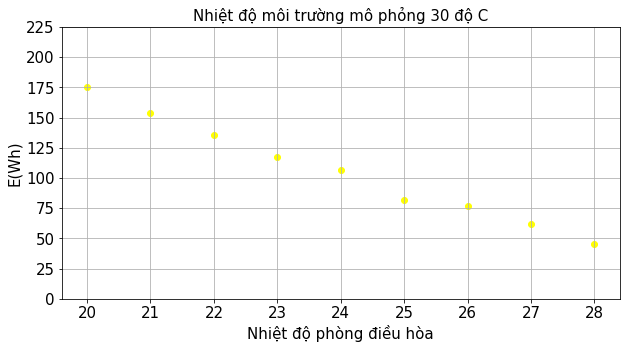

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(df['T phòng'].iloc[:9],df['E(wh).1'].iloc[:9],color='yellow')
#plt.scatter(df['T phòng'].iloc[:9],df['E(wh).2'].iloc[:9],color='blue',label='Ngày 2')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,250,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng điều hòa',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Nhiệt độ môi trường mô phỏng 30 độ C',fontsize=15)
plt.grid()
plt.show()

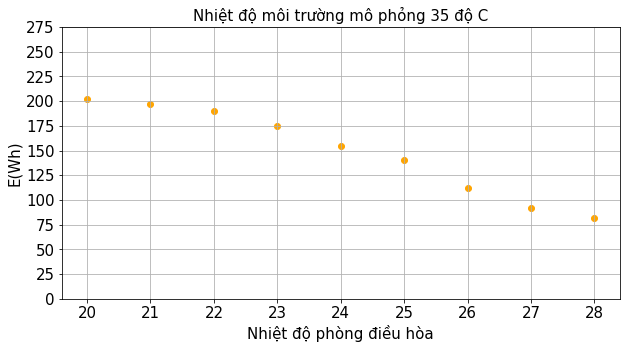

In [6]:
plt.figure(figsize=(10,5))
plt.scatter(df['T phòng'].iloc[9:18],df['E(wh).1'].iloc[9:18],color='orange')
#plt.scatter(df['T phòng'].iloc[:9],df['E(wh).2'].iloc[:9],color='blue',label='Ngày 2')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,300,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng điều hòa',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Nhiệt độ môi trường mô phỏng 35 độ C',fontsize=15)
plt.grid()
plt.show()

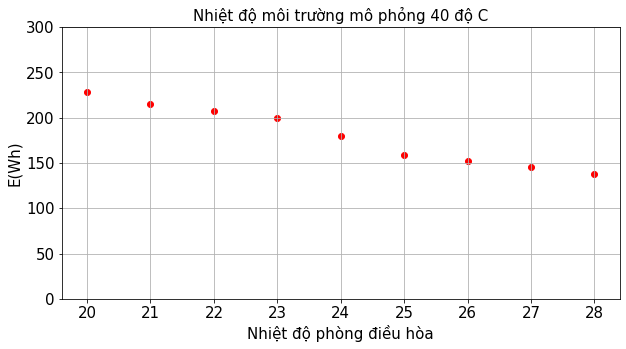

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(df['T phòng'].iloc[18:],df['E(wh).1'].iloc[18:],color='red')
#plt.scatter(df['T phòng'].iloc[:9],df['E(wh).2'].iloc[:9],color='blue',label='Ngày 2')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng điều hòa',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Nhiệt độ môi trường mô phỏng 40 độ C',fontsize=15)
plt.grid()
plt.show()

# Chuẩn bị dữ liệu đã xử lý

In [8]:
new_df = pd.read_excel(r'D:\HỌC TẬP\ĐỒ ÁN TỐT NGHIỆP\Khảo sát mô hình đối chiếu hệ thống lạnh.xlsx',sheet_name='P2.new')
new_df

,T môi trường,T phòng,E(wh).1
0,30,20,175
1,30,21,154
2,30,22,136
3,30,23,117
4,30,24,107
5,30,25,82
6,30,26,77
7,30,27,62
8,30,28,45
9,35,20,202


In [9]:
#new_df = new_df.drop(['I(A)','I(A).1'],axis=1)

# Mở rộng tập dữ liệu

In [10]:
new_df['E(wh).2'] = round(29*new_df['E(wh).1']/33)
new_df['E(wh).3'] = round(30*new_df['E(wh).1']/33)
new_df['E(wh).4'] = round(31*new_df['E(wh).1']/33)
new_df['E(wh).5'] = round(32*new_df['E(wh).1']/33)
new_df['E(wh).6'] = round(34*new_df['E(wh).1']/33)
new_df['E(wh).7'] = round(35*new_df['E(wh).1']/33)
new_df['E(wh).8'] = round(36*new_df['E(wh).1']/33)

In [11]:
print(pd.DataFrame(new_df))

    T môi trường  T phòng  E(wh).1  E(wh).2  E(wh).3  E(wh).4  E(wh).5  \
0             30       20      175    154.0    159.0    164.0    170.0   
1             30       21      154    135.0    140.0    145.0    149.0   
2             30       22      136    120.0    124.0    128.0    132.0   
3             30       23      117    103.0    106.0    110.0    113.0   
4             30       24      107     94.0     97.0    101.0    104.0   
5             30       25       82     72.0     75.0     77.0     80.0   
6             30       26       77     68.0     70.0     72.0     75.0   
7             30       27       62     54.0     56.0     58.0     60.0   
8             30       28       45     40.0     41.0     42.0     44.0   
9             35       20      202    178.0    184.0    190.0    196.0   
10            35       21      197    173.0    179.0    185.0    191.0   
11            35       22      190    167.0    173.0    178.0    184.0   
12            35       23      175    

In [12]:
E_1 = np.array(new_df[['T môi trường','T phòng','E(wh).1']])
E_2 = np.array(new_df[['T môi trường','T phòng','E(wh).2']])
E_3 = np.array(new_df[['T môi trường','T phòng','E(wh).3']])
E_4 = np.array(new_df[['T môi trường','T phòng','E(wh).4']])
E_5 = np.array(new_df[['T môi trường','T phòng','E(wh).5']])
E_6 = np.array(new_df[['T môi trường','T phòng','E(wh).6']])
E_7 = np.array(new_df[['T môi trường','T phòng','E(wh).7']])
E_8 = np.array(new_df[['T môi trường','T phòng','E(wh).8']])

In [13]:
data_set = np.concatenate((E_1,E_2,E_3,E_4,E_5,E_6,E_7,E_8),axis=0)

In [14]:
data_set_frame = pd.DataFrame(data_set)
data_set_frame.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng']
data_set_frame
#data_set_frame.corr()

,Nhiệt độ môi trường,Nhiệt độ phòng,Điện năng
0,30.0,20.0,175.0
1,30.0,21.0,154.0
2,30.0,22.0,136.0
3,30.0,23.0,117.0
4,30.0,24.0,107.0
...,...,...,...
211,40.0,24.0,196.0
212,40.0,25.0,173.0
213,40.0,26.0,166.0
214,40.0,27.0,158.0


# Trực quan dữ liệu

## 30 độ C


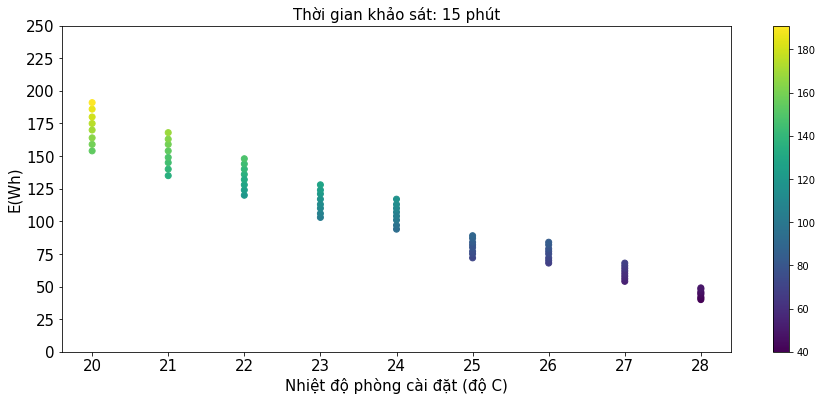

In [15]:
temp_30 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 30]

plt.figure(figsize=(15,6))
plt.scatter(temp_30['Nhiệt độ phòng'],temp_30['Điện năng'],c=temp_30['Điện năng'])
plt.xticks(np.arange(20,29,1),['20','21','22','23','24','25','26','27','28'],fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.colorbar()
plt.show()

In [16]:
# Hàm hiện số lên cột bar
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontsize=15)

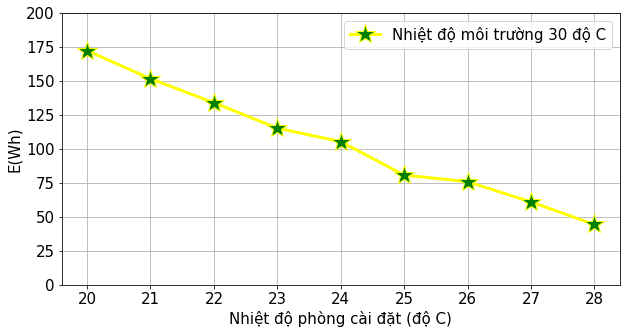

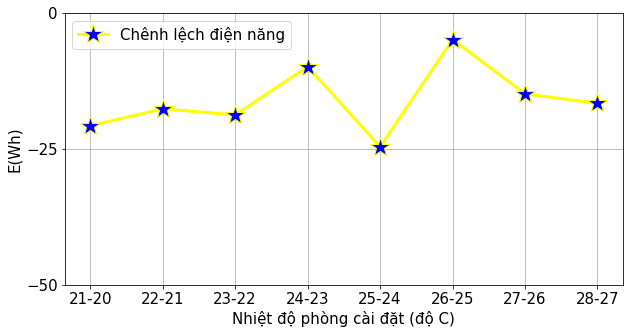

In [17]:
temp_30_detail = []
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 20]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 21]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 22]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 23]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 24]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 25]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 26]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 27]['Điện năng'].mean())
temp_30_detail.append(temp_30.loc[temp_30['Nhiệt độ phòng'] == 28]['Điện năng'].mean())
temp_30_detail = np.array(temp_30_detail)


plt.figure(figsize=(10,5))
# plt.subplot(121)
plt.plot(np.arange(20,29,1),temp_30_detail,linewidth=3,color='yellow',
        marker='*',markersize=20,markerfacecolor='green',label='Nhiệt độ môi trường 30 độ C')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,225,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
diff_temp_30_detail = pd.DataFrame(temp_30_detail).diff(1)
# plt.subplot(122)
plt.plot(np.arange(20,28,1),diff_temp_30_detail[1:].values,linewidth=3,color='yellow',
        marker='*',markersize=20,markerfacecolor='blue',label='Chênh lệch điện năng')
plt.xticks(np.arange(20,28,1),['21-20','22-21','23-22','24-23','25-24','26-25','27-26','28-27'],fontsize=15)
plt.yticks(np.arange(-50,25,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()

plt.show()

## 35 độ C

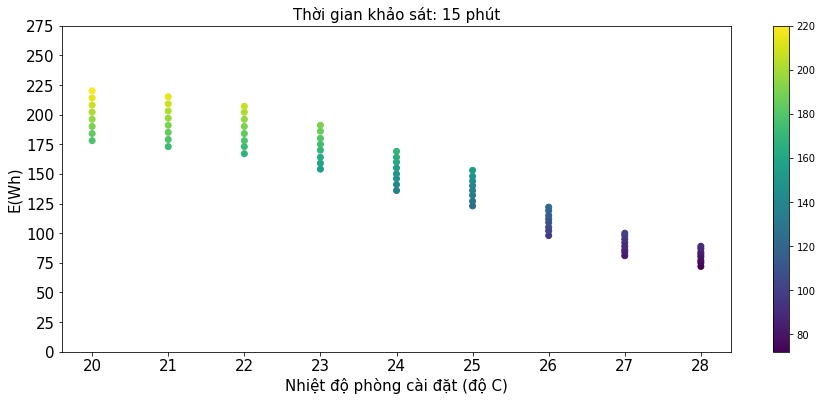

In [18]:
temp_35 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 35]
plt.figure(figsize=(15,6))
plt.scatter(temp_35['Nhiệt độ phòng'],temp_35['Điện năng'],c=temp_35['Điện năng'])
plt.xticks(np.arange(20,29,1),['20','21','22','23','24','25','26','27','28'],fontsize=15)
plt.yticks(np.arange(0,300,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.colorbar()
plt.show()

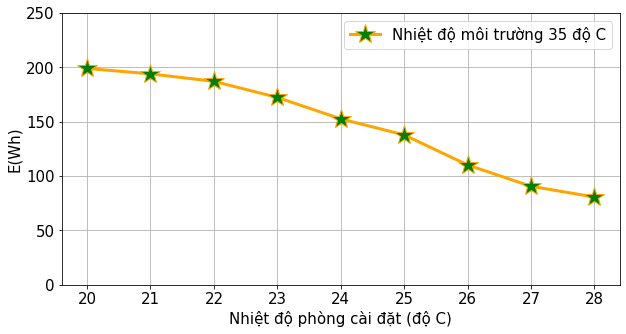

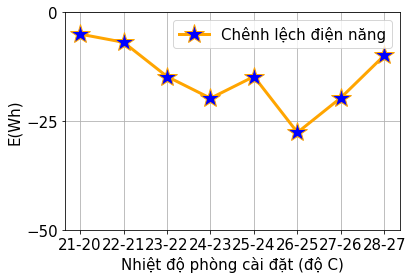

In [19]:
temp_35_detail = []
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 20]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 21]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 22]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 23]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 24]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 25]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 26]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 27]['Điện năng'].mean())
temp_35_detail.append(temp_35.loc[temp_35['Nhiệt độ phòng'] == 28]['Điện năng'].mean())
temp_35_detail = np.array(temp_35_detail)


plt.figure(figsize=(10,5))
# plt.subplot(121)
plt.plot(np.arange(20,29,1),temp_35_detail,linewidth=3,color='orange',
        marker='*',markersize=20,markerfacecolor='green',label='Nhiệt độ môi trường 35 độ C')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.show()

diff_temp_35_detail = pd.DataFrame(temp_35_detail).diff(1)
# plt.subplot(122)
plt.plot(np.arange(20,28,1),diff_temp_35_detail[1:].values,linewidth=3,color='orange',
        marker='*',markersize=20,markerfacecolor='blue',label='Chênh lệch điện năng')
plt.xticks(np.arange(20,28,1),['21-20','22-21','23-22','24-23','25-24','26-25','27-26','28-27'],fontsize=15)
plt.yticks(np.arange(-50,25,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()

plt.show()

## 40 độ C

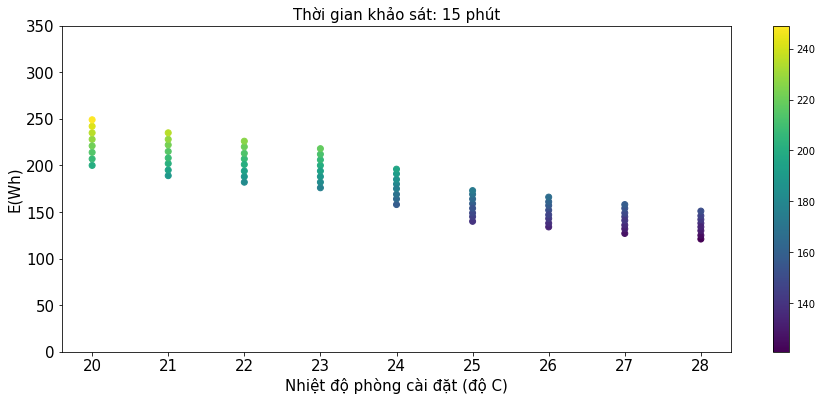

In [20]:
temp_40 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 40]
plt.figure(figsize=(15,6))
plt.scatter(temp_40['Nhiệt độ phòng'],temp_40['Điện năng'],c=temp_40['Điện năng'])
plt.xticks(np.arange(20,29,1),['20','21','22','23','24','25','26','27','28'],fontsize=15)
plt.yticks(np.arange(0,400,50),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.colorbar()
plt.show()

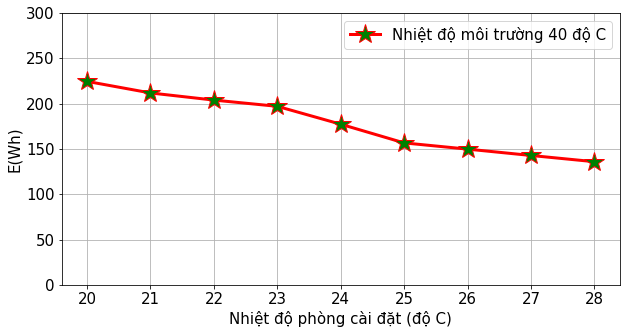

In [21]:
temp_40_detail = []
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 20]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 21]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 22]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 23]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 24]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 25]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 26]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 27]['Điện năng'].mean())
temp_40_detail.append(temp_40.loc[temp_40['Nhiệt độ phòng'] == 28]['Điện năng'].mean())
temp_40_detail = np.array(temp_40_detail)


plt.figure(figsize=(10,5))
# plt.subplot(121)
plt.plot(np.arange(20,29,1),temp_40_detail,linewidth=3,color='red',
        marker='*',markersize=20,markerfacecolor='green',label='Nhiệt độ môi trường 40 độ C')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()

# diff_temp_40_detail = pd.DataFrame(temp_40_detail).diff(1)
# plt.subplot(122)
# plt.plot(np.arange(20,28,1),diff_temp_40_detail[1:].values,linewidth=3,color='red',
#         marker='*',markersize=20,markerfacecolor='blue',label='Chênh lệch điện năng')
# plt.xticks(np.arange(20,28,1),['21-20','22-21','23-22','24-23','25-24','26-25','27-26','28-27'],fontsize=15)
# plt.yticks(np.arange(-50,25,25),fontsize=15)
# plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
# plt.ylabel('E(Wh)',fontsize=15)
# plt.legend(loc='best',fontsize=15)
# plt.grid()

plt.show()


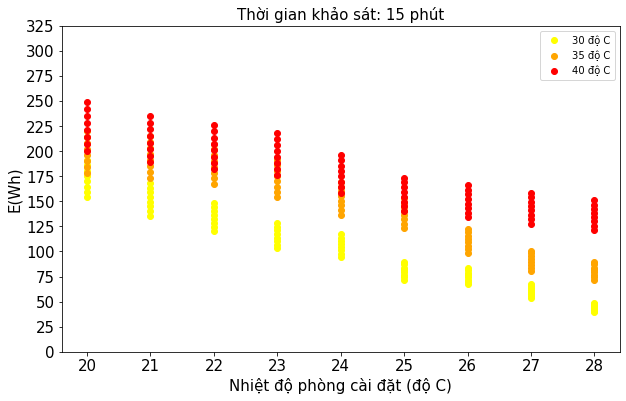

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(temp_30['Nhiệt độ phòng'],temp_30['Điện năng'],color='yellow',label='30 độ C')
plt.scatter(temp_35['Nhiệt độ phòng'],temp_35['Điện năng'],color='orange',label='35 độ C')
plt.scatter(temp_40['Nhiệt độ phòng'],temp_40['Điện năng'],color='red',label='40 độ C')
plt.xticks(np.arange(20,29,1),['20','21','22','23','24','25','26','27','28'],fontsize=15)
plt.yticks(np.arange(0,350,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best')
plt.show()

## So sánh

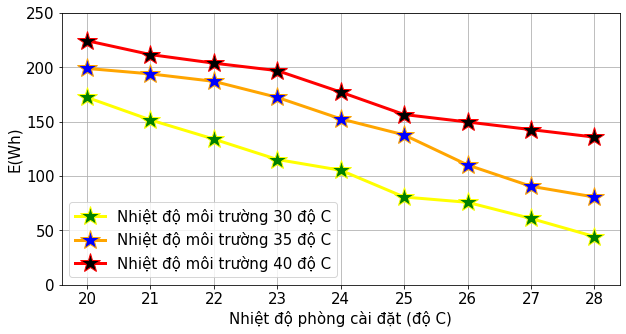

[15.44597534 27.94723825 39.64552239 49.56616052 44.83985765 70.74303406
 45.30477759 48.56557377 81.97183099]
[12.81407035  9.14948454  8.9512358  14.28571429 16.13431613 13.59927471
 35.8276644  57.51724138 68.26625387]
[ 30.23930384  39.65375103  52.14552239  70.93275488  68.20877817
  93.9628483   97.36408567 134.01639344 206.1971831 ]


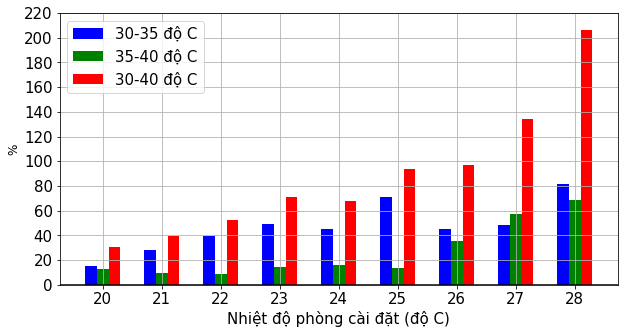

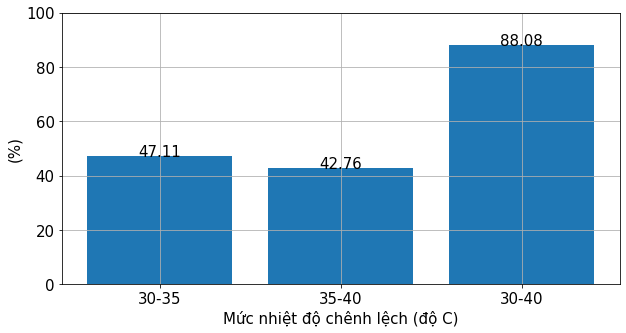

[47.114441173721694, 42.75726744719747, 88.08006898016181]


In [23]:
plt.figure(figsize=(10,5))
# plt.subplot(121)
plt.plot(np.arange(20,29,1),temp_30_detail,linewidth=3,color='yellow',
        marker='*',markersize=20,markerfacecolor='green',label='Nhiệt độ môi trường 30 độ C')
plt.plot(np.arange(20,29,1),temp_35_detail,linewidth=3,color='orange',
        marker='*',markersize=20,markerfacecolor='blue',label='Nhiệt độ môi trường 35 độ C')
plt.plot(np.arange(20,29,1),temp_40_detail,linewidth=3,color='red',
        marker='*',markersize=20,markerfacecolor='black',label='Nhiệt độ môi trường 40 độ C')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()

# plt.subplot(122)
# plt.plot(np.arange(20,28,1),diff_temp_30_detail[1:].values,linewidth=3,color='yellow',
#         marker='*',markersize=20,markerfacecolor='green',label='Chênh lệch điện năng (30 độ C)')
# plt.plot(np.arange(20,28,1),diff_temp_35_detail[1:].values,linewidth=3,color='orange',
#         marker='*',markersize=20,markerfacecolor='blue',label='Chênh lệch điện năng (35 độ C)')
# plt.plot(np.arange(20,28,1),diff_temp_40_detail[1:].values,linewidth=3,color='red',
#         marker='*',markersize=20,markerfacecolor='black',label='Chênh lệch điện năng (40 độ C)')
# plt.xticks(np.arange(20,28,1),['21-20','22-21','23-22','24-23','25-24','26-25','27-26','28-27'],fontsize=15)
# plt.yticks(np.arange(-50,50,25),fontsize=15)
# plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
# plt.ylabel('E(Wh)',fontsize=15)
# plt.legend(loc='best',fontsize=15)
# plt.grid()

plt.show()

percent_30_35 = ((temp_35_detail - temp_30_detail)/temp_30_detail)*100
print(percent_30_35)
percent_35_40 = ((temp_40_detail - temp_35_detail)/temp_35_detail)*100
print(percent_35_40)
percent_30_40 = ((temp_40_detail - temp_30_detail)/temp_30_detail)*100
print(percent_30_40)

X = np.arange(20,29,1)
plt.figure(figsize=(10,5))
plt.bar(X-0.2,percent_30_35,width=0.2,color='blue',label='30-35 độ C')
plt.bar(X,percent_35_40,width=0.2,color='green',label='35-40 độ C')
plt.bar(X+0.2,percent_30_40,width=0.2,color='red',label='30-40 độ C')
plt.axhline(y=0,color='black')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,240,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('%',fontsize=12)
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.show()

mean_percent = []
mean_percent.append(percent_30_35.mean())
mean_percent.append(percent_30_35[:-1].mean())
mean_percent.append(percent_30_40.mean())

plt.figure(figsize=(10,5))
plt.bar(np.arange(3),mean_percent)
plt.xticks(np.arange(0,3,1),['30-35','35-40','30-40'],fontsize=15)
plt.yticks(np.arange(0,120,20),fontsize=15)
plt.xlabel('Mức nhiệt độ chênh lệch (độ C)',fontsize=15)
plt.ylabel('(%)',fontsize=15)
addlabels(np.arange(3),np.array(mean_percent).round(2))
plt.grid()
plt.show()
print(mean_percent)

# Xây dựng mô hình

## Chuẩn bị tập dữ liệu (training và testing data)

In [24]:
data_set.shape

(216, 3)

In [25]:
data_set

array([[ 30.,  20., 175.],
       [ 30.,  21., 154.],
       [ 30.,  22., 136.],
       [ 30.,  23., 117.],
       [ 30.,  24., 107.],
       [ 30.,  25.,  82.],
       [ 30.,  26.,  77.],
       [ 30.,  27.,  62.],
       [ 30.,  28.,  45.],
       [ 35.,  20., 202.],
       [ 35.,  21., 197.],
       [ 35.,  22., 190.],
       [ 35.,  23., 175.],
       [ 35.,  24., 155.],
       [ 35.,  25., 140.],
       [ 35.,  26., 112.],
       [ 35.,  27.,  92.],
       [ 35.,  28.,  82.],
       [ 40.,  20., 228.],
       [ 40.,  21., 215.],
       [ 40.,  22., 207.],
       [ 40.,  23., 200.],
       [ 40.,  24., 180.],
       [ 40.,  25., 159.],
       [ 40.,  26., 152.],
       [ 40.,  27., 145.],
       [ 40.,  28., 138.],
       [ 30.,  20., 154.],
       [ 30.,  21., 135.],
       [ 30.,  22., 120.],
       [ 30.,  23., 103.],
       [ 30.,  24.,  94.],
       [ 30.,  25.,  72.],
       [ 30.,  26.,  68.],
       [ 30.,  27.,  54.],
       [ 30.,  28.,  40.],
       [ 35.,  20., 178.],
 

In [26]:
X_set = data_set[:,0:2]
y_set = data_set[:,2]

In [27]:
scalerX = MinMaxScaler()
X_scaled_set = scalerX.fit_transform(X_set)

In [28]:
scalery = MinMaxScaler()
scalery.fit(y_set.reshape(-1,1))
y_scaled_set = scalery.transform(y_set.reshape(-1,1))
print(y_scaled_set)

[[0.64593301]
 [0.54545455]
 [0.45933014]
 [0.36842105]
 [0.32057416]
 [0.20095694]
 [0.17703349]
 [0.10526316]
 [0.02392344]
 [0.77511962]
 [0.75119617]
 [0.71770335]
 [0.64593301]
 [0.55023923]
 [0.4784689 ]
 [0.34449761]
 [0.24880383]
 [0.20095694]
 [0.89952153]
 [0.83732057]
 [0.79904306]
 [0.76555024]
 [0.66985646]
 [0.56937799]
 [0.53588517]
 [0.50239234]
 [0.46889952]
 [0.54545455]
 [0.45454545]
 [0.38277512]
 [0.30143541]
 [0.25837321]
 [0.15311005]
 [0.13397129]
 [0.06698565]
 [0.        ]
 [0.66028708]
 [0.63636364]
 [0.6076555 ]
 [0.54545455]
 [0.45933014]
 [0.39712919]
 [0.27751196]
 [0.19617225]
 [0.15311005]
 [0.76555024]
 [0.71291866]
 [0.67942584]
 [0.6507177 ]
 [0.5645933 ]
 [0.4784689 ]
 [0.44976077]
 [0.41626794]
 [0.38755981]
 [0.56937799]
 [0.4784689 ]
 [0.40191388]
 [0.31578947]
 [0.27272727]
 [0.16746411]
 [0.14354067]
 [0.07655502]
 [0.00478469]
 [0.68899522]
 [0.66507177]
 [0.63636364]
 [0.56937799]
 [0.48325359]
 [0.41626794]
 [0.29665072]
 [0.21052632]
 [0.16

In [29]:
# X_train, X_test, y_train, y_test = train_test_split(X_set, y_scaled_set, test_size=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_set, y_scaled_set, test_size=0.1, random_state=42)

## Mô hình Linear Regression (hồi quy tuyến tính)

In [30]:
linear_model = LinearRegression()
linear_model_fit = linear_model.fit(X_train, y_train)
print('Coefficence: ',linear_model_fit.score(X_train, y_train))

Coefficence:  0.930205013583863


In [31]:
metric_coef = pd.DataFrame(linear_model_fit.coef_)
print('Hệ số nhiệt độ môi trường: ',metric_coef.iloc[0,0])
print('Hệ số nhiệt độ phòng cài đặt: ',metric_coef.iloc[0,1])

Hệ số nhiệt độ môi trường:  0.03496461295046896
Hệ số nhiệt độ phòng cài đặt:  -0.06977172354867096


In [32]:
intercep_linear = pd.DataFrame(linear_model_fit.intercept_)
print('Số chặn: ',intercep_linear.iloc[0])

Số chặn:  0    0.942309
Name: 0, dtype: float64


### Vẽ đồ thị tuyến tính

### 30 độ C

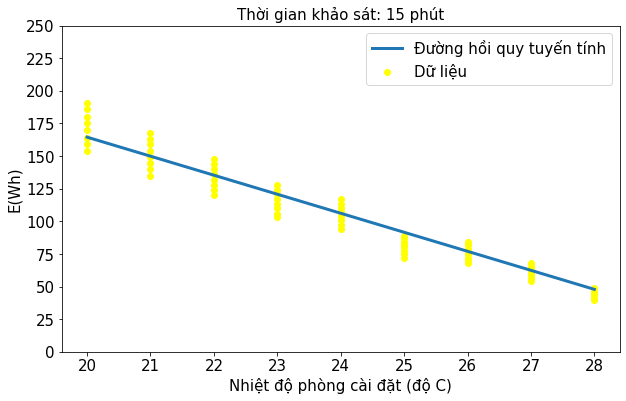

In [33]:
linear_line_data_30 = np.array([[30,30,30,30,30,30,30,30,30],
                   [20,21,22,23,24,25,26,27,28]])
linear_line_data_30 = np.array(linear_line_data_30)
predicted_linear_30 = pd.DataFrame(scalery.inverse_transform(linear_model_fit.predict(linear_line_data_30.T)))
linear_line_data_30 = pd.DataFrame(linear_line_data_30.T)
linear_line_data_30 = pd.concat([linear_line_data_30,predicted_linear_30],axis=1)
linear_line_data_30
linear_line_data_30.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']

temp_30 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 30]
plt.figure(figsize=(10,6))
plt.scatter(temp_30['Nhiệt độ phòng'].values,temp_30['Điện năng'],color='yellow',label='Dữ liệu')
plt.plot(linear_line_data_30.iloc[:,1].values,linear_line_data_30.iloc[:,2].values,linewidth=3,label='Đường hồi quy tuyến tính')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [34]:
linear_line_data_30

,Nhiệt độ môi trường,Nhiệt độ phòng,Điện năng dự đoán
0,30,20,164.524960
1,30,21,149.942669
2,30,22,135.360379
3,30,23,120.778089
4,30,24,106.195799
5,30,25,91.613508
6,30,26,77.031218
7,30,27,62.448928
8,30,28,47.866638


### 35 độ C

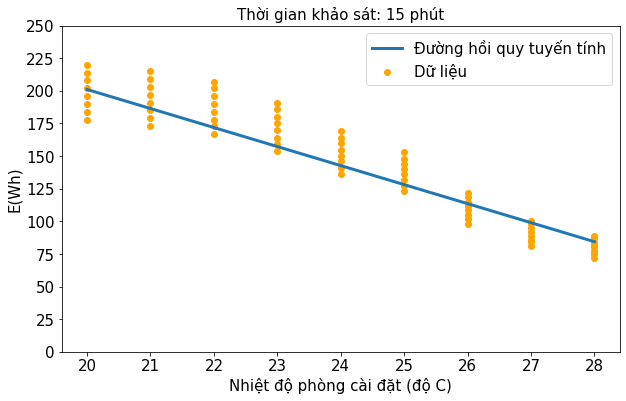

In [35]:
linear_line_data_35 = np.array([[35,35,35,35,35,35,35,35,35],
                   [20,21,22,23,24,25,26,27,28]])
linear_line_data_35 = np.array(linear_line_data_35)
predicted_linear_35 = pd.DataFrame(scalery.inverse_transform(linear_model_fit.predict(linear_line_data_35.T)))
linear_line_data_35 = pd.DataFrame(linear_line_data_35.T)
linear_line_data_35 = pd.concat([linear_line_data_35,predicted_linear_35],axis=1)
linear_line_data_35
linear_line_data_35.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']

temp_35 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 35]
plt.figure(figsize=(10,6))
plt.scatter(temp_35['Nhiệt độ phòng'].values,temp_35['Điện năng'],color='orange',label='Dữ liệu')
plt.plot(linear_line_data_35.iloc[:,1].values,linear_line_data_35.iloc[:,2].values,linewidth=3,label='Đường hồi quy tuyến tính')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

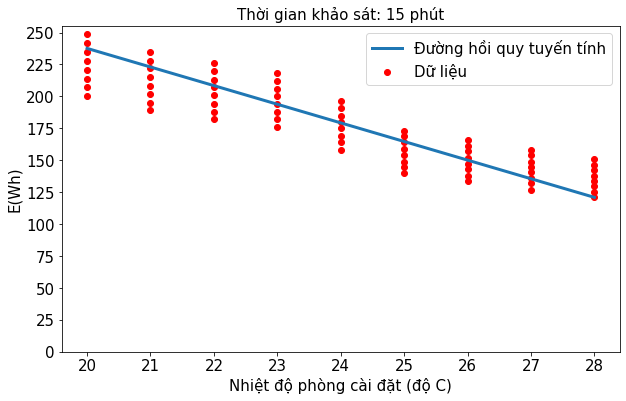

In [36]:
linear_line_data_40 = np.array([[40,40,40,40,40,40,40,40,40],
                   [20,21,22,23,24,25,26,27,28]])
linear_line_data_40 = np.array(linear_line_data_40)
predicted_linear_40 = pd.DataFrame(scalery.inverse_transform(linear_model_fit.predict(linear_line_data_40.T)))
linear_line_data_40 = pd.DataFrame(linear_line_data_40.T)
linear_line_data_40 = pd.concat([linear_line_data_40,predicted_linear_40],axis=1)
linear_line_data_40
linear_line_data_40.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']

temp_40 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 40]
plt.figure(figsize=(10,6))
plt.scatter(temp_40['Nhiệt độ phòng'].values,temp_40['Điện năng'],color='red',label='Dữ liệu')
plt.plot(linear_line_data_40.iloc[:,1].values,linear_line_data_40.iloc[:,2].values,linewidth=3,label='Đường hồi quy tuyến tính')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

### Phương trình hồi quy tuyến tính cuối cùng

Phương trình hồi quy tuyến tính: y= 0.035X1-0.07X2-0.07
Dữ liệu đầu ra cần được chuẩn hóa lại!
-------------------------------------------------------------------------------------------------------------------
Sai số bình phương trung bình điều kiện nhiệt độ MT 30 độ C =  25.69
Sai số bình phương trung bình điều kiện nhiệt độ MT 35 độ C =  89.57
Sai số bình phương trung bình điều kiện nhiệt độ MT 40 độ C =  74.86


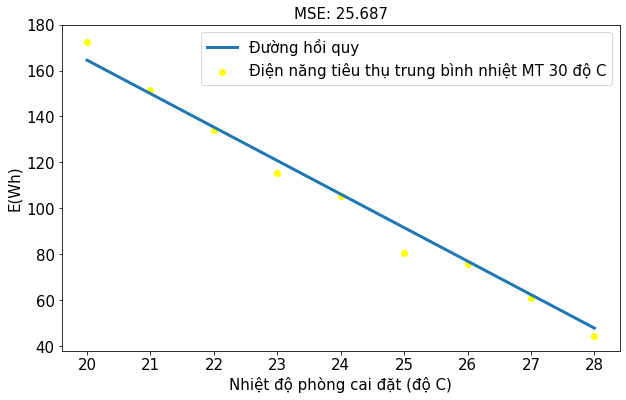

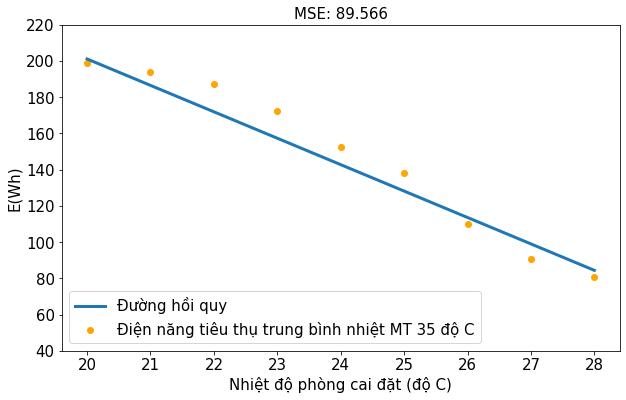

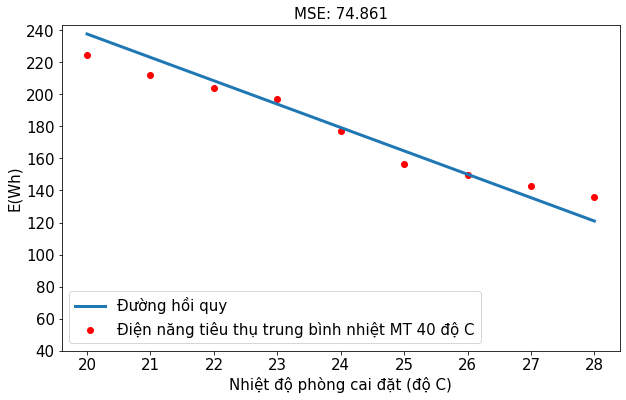

In [37]:
print('Phương trình hồi quy tuyến tính: y= ' + str(metric_coef.iloc[0,0].round(3)) + 'X1' + str(metric_coef.iloc[0,1].round(3)) 
     + 'X2' + str(metric_coef.iloc[0,1].round(2)))
print('Dữ liệu đầu ra cần được chuẩn hóa lại!')
print('-------------------------------------------------------------------------------------------------------------------')
def MSE(MT,y_actual,y_predicted):
    MSE = (((y_actual - y_predicted)**2).sum())/len(y_actual)
    print('Sai số bình phương trung bình điều kiện nhiệt độ MT '+ str(MT) + ' độ C = ',MSE.round(2))
MSE(30,temp_30_detail, predicted_linear_30.values.flatten())
MSE(35,temp_35_detail, predicted_linear_35.values.flatten())
MSE(40,temp_40_detail, predicted_linear_40.values.flatten())

MSE_linear_30 = (((temp_30_detail - predicted_linear_30.values.flatten())**2).sum())/len(temp_30_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_linear_30.values,linewidth=3,label='Đường hồi quy')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_linear_30.round(3)),fontsize=15)
plt.show()

MSE_linear_35 = (((temp_35_detail - predicted_linear_35.values.flatten())**2).sum())/len(temp_35_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_linear_35.values,linewidth=3,label='Đường hồi quy')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,240,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_linear_35.round(3)),fontsize=15)
plt.show()

MSE_linear_40 = (((temp_40_detail - predicted_linear_40.values.flatten())**2).sum())/len(temp_40_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_linear_40.values,linewidth=3,label='Đường hồi quy')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,260,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_linear_40.round(3)),fontsize=15)
plt.show()

### Dự đoán với testing data

    Nhiệt độ môi trường  Nhiệt độ phòng  Điện năng thực tế  Điện năng dự đoán
0                  35.0            23.0              191.0         157.316109
1                  40.0            26.0              166.0         150.107259
2                  30.0            23.0              121.0         120.778089
3                  35.0            26.0              119.0         113.569239
4                  35.0            26.0              112.0         113.569239
5                  30.0            23.0              113.0         120.778089
6                  40.0            22.0              220.0         208.436420
7                  40.0            21.0              195.0         223.018710
8                  35.0            27.0              100.0          98.986949
9                  30.0            24.0              110.0         106.195799
10                 40.0            26.0              157.0         150.107259
11                 30.0            23.0              103.0      

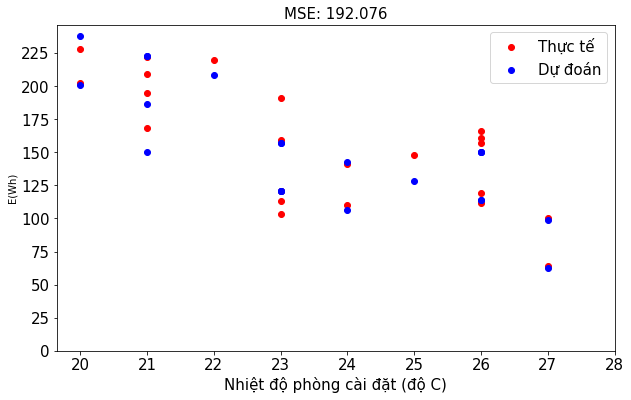

In [38]:
predicted_data_linear = linear_model_fit.predict(X_test)
predicted_data_linear = scalery.inverse_transform(predicted_data_linear)
table_linear = np.concatenate((X_test,scalery.inverse_transform(y_test),
                               predicted_data_linear),axis=1)
table_linear = pd.DataFrame(table_linear)
table_linear.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng thực tế','Điện năng dự đoán']
print(table_linear)

MSE_predicted_linear = (((table_linear['Điện năng thực tế'].values - table_linear['Điện năng dự đoán'].values)**2).sum())/len(table_linear['Điện năng thực tế'])
plt.figure(figsize=(10,6))
plt.scatter(table_linear['Nhiệt độ phòng'],table_linear['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_linear['Nhiệt độ phòng'],table_linear['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,250,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)')
plt.title('MSE: ' + str(MSE_predicted_linear.round(3)),fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [39]:
MSE(all,table_linear['Điện năng thực tế'].values,table_linear['Điện năng dự đoán'])

Sai số bình phương trung bình điều kiện nhiệt độ MT <built-in function all> độ C =  192.08


In [40]:
def predict_linear_function(x,y):
    predict = scalery.inverse_transform(linear_model_fit.predict([[x,y]]))
    predict = pd.DataFrame(predict)
    return print('Điện năng tiêu thụ với T môi trường=' + str(x) + ' và T phòng='+ str(y) + ' là '
                 + str(predict.iloc[0,0].round(2)) + '(Wh)')
# Dự đoán số nhập từ bàn phím

In [41]:
predict_linear_function(36,27)

Điện năng tiêu thụ với T môi trường=36 và T phòng=27 là 106.29(Wh)


## Mô hình Polynomial Regression (hồi quy đa thức mũ)

### Trường hợp interaction_only=True và include_bias=True: y=a1x1 + a2x2 + a3x1x2 + a4

In [42]:
# Dùng một câu lệnh này là đủ, bậc 2, không gồm số chặn
X_transformed_train_1 = PolynomialFeatures(degree=2, include_bias=True,interaction_only=True).fit_transform(X_train)
X_transformed_train_1

array([[1.00e+00, 4.00e+01, 2.70e+01, 1.08e+03],
       [1.00e+00, 4.00e+01, 2.70e+01, 1.08e+03],
       [1.00e+00, 4.00e+01, 2.50e+01, 1.00e+03],
       [1.00e+00, 3.50e+01, 2.20e+01, 7.70e+02],
       [1.00e+00, 4.00e+01, 2.80e+01, 1.12e+03],
       [1.00e+00, 3.50e+01, 2.70e+01, 9.45e+02],
       [1.00e+00, 4.00e+01, 2.00e+01, 8.00e+02],
       [1.00e+00, 3.50e+01, 2.10e+01, 7.35e+02],
       [1.00e+00, 3.00e+01, 2.00e+01, 6.00e+02],
       [1.00e+00, 3.00e+01, 2.10e+01, 6.30e+02],
       [1.00e+00, 3.00e+01, 2.40e+01, 7.20e+02],
       [1.00e+00, 3.00e+01, 2.30e+01, 6.90e+02],
       [1.00e+00, 3.50e+01, 2.70e+01, 9.45e+02],
       [1.00e+00, 4.00e+01, 2.20e+01, 8.80e+02],
       [1.00e+00, 4.00e+01, 2.30e+01, 9.20e+02],
       [1.00e+00, 3.00e+01, 2.00e+01, 6.00e+02],
       [1.00e+00, 3.50e+01, 2.10e+01, 7.35e+02],
       [1.00e+00, 3.50e+01, 2.80e+01, 9.80e+02],
       [1.00e+00, 3.50e+01, 2.60e+01, 9.10e+02],
       [1.00e+00, 4.00e+01, 2.40e+01, 9.60e+02],
       [1.00e+00, 3.

In [43]:
model_1 = LinearRegression().fit(X_transformed_train_1, y_train)

In [44]:
R2_1 = model_1.score(X_transformed_train_1, y_train)
print('Chỉ số R2 = ', R2_1)

Chỉ số R2 =  0.9361414913263035


In [45]:
model_1.score(PolynomialFeatures(degree=2,include_bias=True,interaction_only=True).fit_transform(X_test), y_test)

0.9158115644655508

In [46]:
heso_1 = model_1.coef_
heso_1 = pd.DataFrame(heso_1)
sochan_1 = model_1.intercept_
sochan_1 = pd.DataFrame(sochan_1)
for i in range(1,4):
    print('Hế số a' + str(i) + ' = ' + str(heso_1.iloc[0,i].round(4)))
print('Số chặn a4 =',sochan_1.iloc[0,0].round(3))

Hế số a1 = -0.0066
Hế số a2 = -0.13
Hế số a3 = 0.0017
Số chặn a4 = 2.392


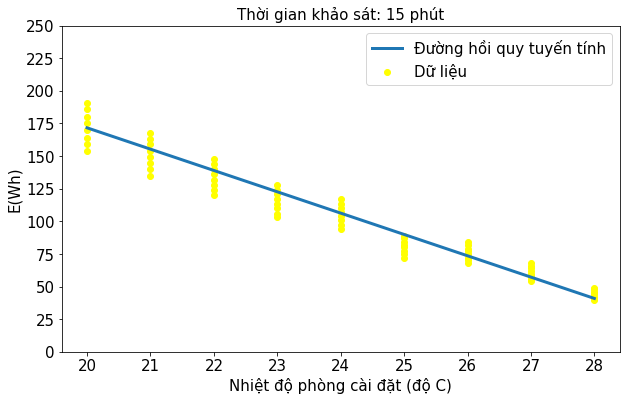

In [47]:
poly_line_data_30_1 = np.array([[30,30,30,30,30,30,30,30,30],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_30_1_trans = PolynomialFeatures(degree=2, include_bias=True,interaction_only=True).fit_transform(poly_line_data_30_1.T)
poly_line_data_30_1_trans
predicted_poly_30_1 = pd.DataFrame(scalery.inverse_transform(model_1.predict(poly_line_data_30_1_trans)))
poly_line_data_30_1 = pd.DataFrame(poly_line_data_30_1.T)
poly_line_data_30_1 = pd.concat([poly_line_data_30_1,predicted_poly_30_1],axis=1)
poly_line_data_30_1.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_30_1

temp_30 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 30]
plt.figure(figsize=(10,6))
plt.scatter(temp_30['Nhiệt độ phòng'].values,temp_30['Điện năng'],color='yellow',label='Dữ liệu')
plt.plot(poly_line_data_30_1.iloc[:,1].values,poly_line_data_30_1['Điện năng dự đoán'].values,linewidth=3,label='Đường hồi quy tuyến tính')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

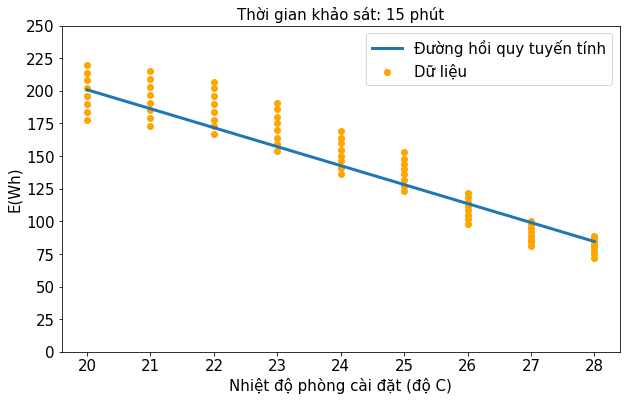

In [48]:
poly_line_data_35_1 = np.array([[35,35,35,35,35,35,35,35,35],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_35_1_trans = PolynomialFeatures(degree=2, include_bias=True,interaction_only=True).fit_transform(poly_line_data_35_1.T)
poly_line_data_35_1_trans
predicted_poly_35_1 = pd.DataFrame(scalery.inverse_transform(model_1.predict(poly_line_data_35_1_trans)))
poly_line_data_35_1 = pd.DataFrame(poly_line_data_35_1.T)
poly_line_data_35_1 = pd.concat([poly_line_data_35_1,predicted_poly_35_1],axis=1)
poly_line_data_35_1.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_35_1

temp_35 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 35]
plt.figure(figsize=(10,6))
plt.scatter(temp_35['Nhiệt độ phòng'].values,temp_35['Điện năng'],color='orange',label='Dữ liệu')
plt.plot(poly_line_data_35_1.iloc[:,1].values,poly_line_data_35_1['Điện năng dự đoán'].values,linewidth=3,label='Đường hồi quy tuyến tính')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

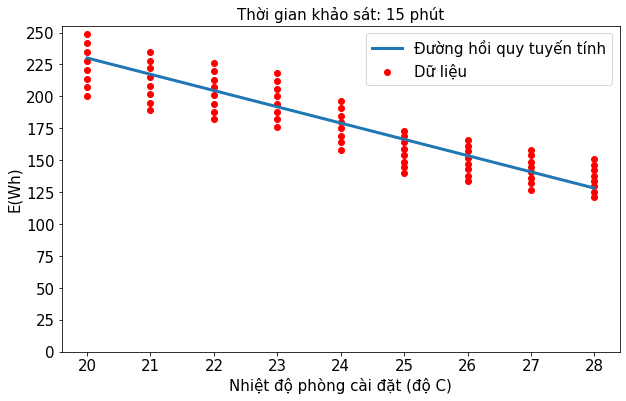

In [49]:
poly_line_data_40_1 = np.array([[40,40,40,40,40,40,40,40,40],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_40_1_trans = PolynomialFeatures(degree=2, include_bias=True,interaction_only=True).fit_transform(poly_line_data_40_1.T)
poly_line_data_40_1_trans
predicted_poly_40_1 = pd.DataFrame(scalery.inverse_transform(model_1.predict(poly_line_data_40_1_trans)))
poly_line_data_40_1 = pd.DataFrame(poly_line_data_40_1.T)
poly_line_data_40_1 = pd.concat([poly_line_data_40_1,predicted_poly_40_1],axis=1)
poly_line_data_40_1.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_40_1

temp_40 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 40]
plt.figure(figsize=(10,6))
plt.scatter(temp_40['Nhiệt độ phòng'].values,temp_40['Điện năng'],color='red',label='Dữ liệu')
plt.plot(poly_line_data_40_1.iloc[:,1].values,poly_line_data_40_1['Điện năng dự đoán'].values,linewidth=3,label='Đường hồi quy tuyến tính')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

Phương trình hồi quy tuyến tính: y= 0.035X1-0.07X2-0.07
Dữ liệu đầu ra cần được chuẩn hóa lại!
-------------------------------------------------------------------------------------------------------------------
Sai số bình phương trung bình điều kiện nhiệt độ MT 30 độ C =  23.37
Sai số bình phương trung bình điều kiện nhiệt độ MT 35 độ C =  90.71
Sai số bình phương trung bình điều kiện nhiệt độ MT 40 độ C =  29.52


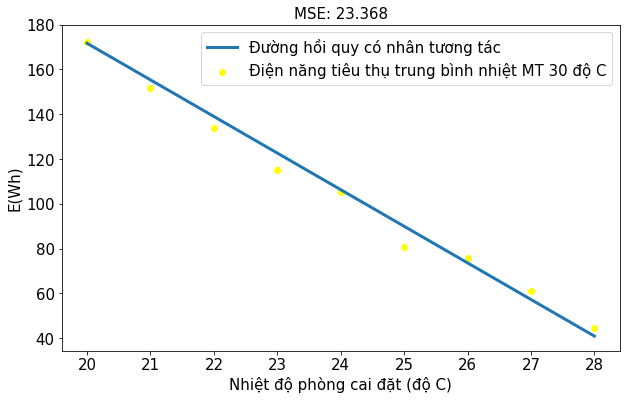

<Figure size 720x432 with 0 Axes>

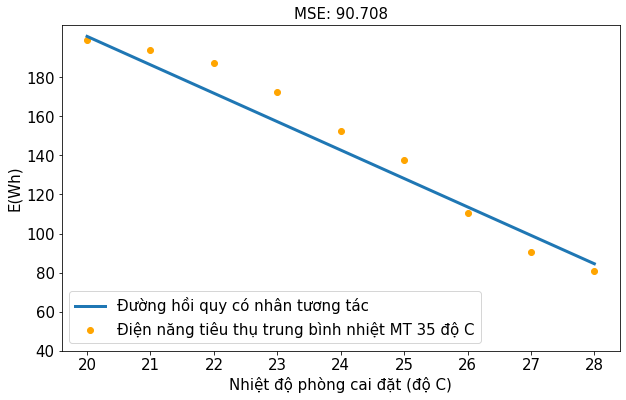

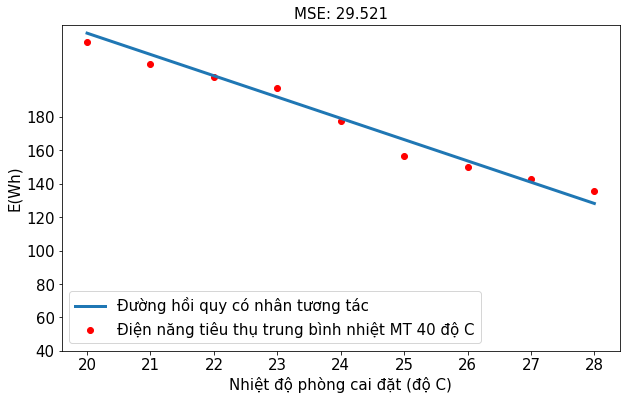

In [50]:
print('Phương trình hồi quy tuyến tính: y= ' + str(metric_coef.iloc[0,0].round(3)) + 'X1' + str(metric_coef.iloc[0,1].round(3)) 
     + 'X2' + str(metric_coef.iloc[0,1].round(2)))
print('Dữ liệu đầu ra cần được chuẩn hóa lại!')
print('-------------------------------------------------------------------------------------------------------------------')
def MSE_poly(MT,y_actual,y_predicted):
    MSE_poly = ((y_actual - y_predicted)**2).sum()/len(y_actual)
    print('Sai số bình phương trung bình điều kiện nhiệt độ MT '+ str(MT) + ' độ C = ',MSE_poly.round(2))
MSE_poly(30,temp_30_detail, predicted_poly_30_1.values.flatten())
MSE_poly(35,temp_35_detail, predicted_poly_35_1.values.flatten())
MSE_poly(40,temp_40_detail, predicted_poly_40_1.values.flatten())

MSE_poly_30_1 = ((temp_30_detail - predicted_poly_30_1.values.flatten())**2).sum()/len(temp_30_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_30_1.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_30_1.round(3)),fontsize=15)
plt.show()

MSE_poly_35_1 = ((temp_35_detail - predicted_poly_35_1.values.flatten())**2).sum()/len(temp_35_detail)
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_35_1.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_35_1.round(3)),fontsize=15)
plt.show()

MSE_poly_40_1 = ((temp_40_detail - predicted_poly_40_1.values.flatten())**2).sum()/len(temp_40_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_40_1.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_40_1.round(3)),fontsize=15)
plt.show()

[[0.56098299]
 [0.54373755]
 [0.39539401]
 [0.35224264]
 [0.35224264]
 [0.39539401]
 [0.78751678]
 [0.84846159]
 [0.28266252]
 [0.31717858]
 [0.54373755]
 [0.39539401]
 [0.55182487]
 [0.76972335]
 [0.49140288]
 [0.42182276]
 [0.70014323]
 [0.9094064 ]
 [0.84846159]
 [0.56098299]
 [0.54373755]
 [0.08253229]]
    Nhiệt độ môi trường  Nhiệt độ phòng  Điện năng thực tế  Điện năng dự đoán
0                  35.0            23.0              191.0         157.245446
1                  40.0            26.0              166.0         153.641149
2                  30.0            23.0              121.0         122.637348
3                  35.0            26.0              119.0         113.618711
4                  35.0            26.0              112.0         113.618711
5                  30.0            23.0              113.0         122.637348
6                  40.0            22.0              220.0         204.591008
7                  40.0            21.0              195.0         

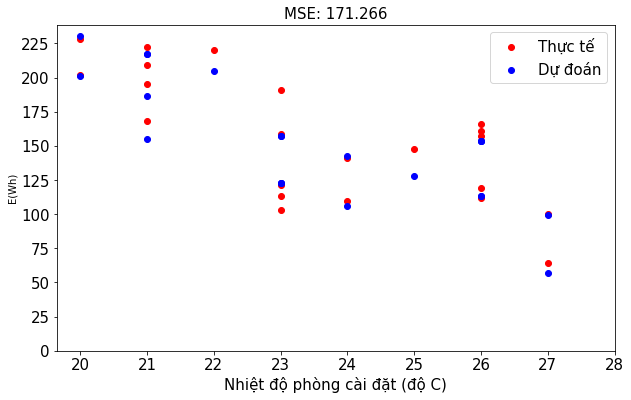

In [51]:
X_test_trans_1 = PolynomialFeatures(degree=2, include_bias=True,interaction_only=True).fit_transform(X_test)
predicted_data_poly_1 = model_1.predict(X_test_trans_1)
print(predicted_data_poly_1)
predicted_data_poly_1 = scalery.inverse_transform(predicted_data_poly_1)
table_poly_1 = np.concatenate((X_test,scalery.inverse_transform(y_test),
                               predicted_data_poly_1),axis=1)
table_poly_1 = pd.DataFrame(table_poly_1)
table_poly_1.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng thực tế','Điện năng dự đoán']
print(table_poly_1)

MSE_predicted_poly_1 =((table_poly_1['Điện năng thực tế'].values.flatten()-table_poly_1['Điện năng dự đoán'].values.flatten())**2).sum()/len(table_poly_1['Điện năng thực tế'].values.flatten())
plt.figure(figsize=(10,6))
plt.scatter(table_poly_1['Nhiệt độ phòng'],table_poly_1['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_poly_1['Nhiệt độ phòng'],table_poly_1['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,250,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)')
plt.title('Điện năng tiêu thụ ở 3 mức nhiệt MT 30-35-40 độ C',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_predicted_poly_1.round(3)),fontsize=15)
plt.show()

### Trường hợp interaction_only=False và include_bias=True: bậc 2
Phương trình có dạng: y=a1x1 + a2x2 + a3(x1)2 + a4(x1x2) + a5(x2)2 + a6

In [52]:
X_transformed_train_2 = PolynomialFeatures(degree=2, include_bias=True,interaction_only=False).fit_transform(X_train)
X_transformed_train_2

array([[1.000e+00, 4.000e+01, 2.700e+01, 1.600e+03, 1.080e+03, 7.290e+02],
       [1.000e+00, 4.000e+01, 2.700e+01, 1.600e+03, 1.080e+03, 7.290e+02],
       [1.000e+00, 4.000e+01, 2.500e+01, 1.600e+03, 1.000e+03, 6.250e+02],
       ...,
       [1.000e+00, 3.500e+01, 2.200e+01, 1.225e+03, 7.700e+02, 4.840e+02],
       [1.000e+00, 3.500e+01, 2.800e+01, 1.225e+03, 9.800e+02, 7.840e+02],
       [1.000e+00, 4.000e+01, 2.300e+01, 1.600e+03, 9.200e+02, 5.290e+02]])

In [53]:
model_2 = LinearRegression().fit(X_transformed_train_2,y_train)

In [54]:
R2_2 = model_2.score(X_transformed_train_2, y_train)
print('Hệ số R2 = ',R2_2)

Hệ số R2 =  0.9390013733333944


In [55]:
heso_2 = model_2.coef_
heso_2 = pd.DataFrame(heso_2)
sochan_2 = model_2.intercept_
sochan_2 = pd.DataFrame(sochan_2)
for i in range(1,6):
    print('Hế số a' + str(i) + ' = ' + str(heso_2.iloc[0,i].round(4)))
print('Số chặn a6 =',sochan_2.iloc[0,0].round(4))

Hế số a1 = 0.0689
Hế số a2 = -0.1137
Hế số a3 = -0.0011
Hế số a4 = 0.0017
Hế số a5 = -0.0003
Số chặn a6 = 0.8968


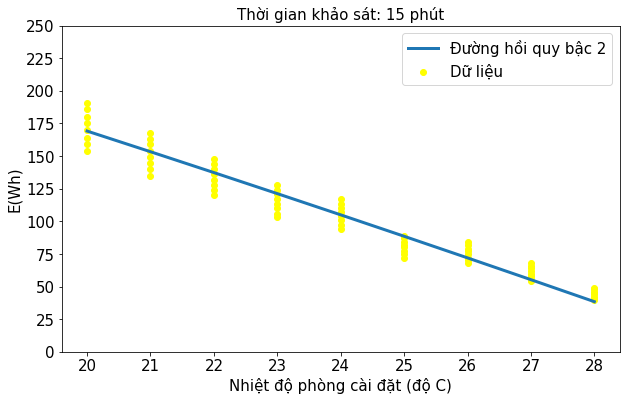

In [56]:
poly_line_data_30_2 = np.array([[30,30,30,30,30,30,30,30,30],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_30_2_trans = PolynomialFeatures(degree=2, include_bias=True,interaction_only=False).fit_transform(poly_line_data_30_2.T)
poly_line_data_30_2_trans
predicted_poly_30_2 = pd.DataFrame(scalery.inverse_transform(model_2.predict(poly_line_data_30_2_trans)))
poly_line_data_30_2 = pd.DataFrame(poly_line_data_30_2.T)
poly_line_data_30_2 = pd.concat([poly_line_data_30_2,predicted_poly_30_2],axis=1)
poly_line_data_30_2.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_30_2

temp_30 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 30]
plt.figure(figsize=(10,6))
plt.scatter(temp_30['Nhiệt độ phòng'].values,temp_30['Điện năng'],color='yellow',label='Dữ liệu')
plt.plot(poly_line_data_30_2.iloc[:,1].values,poly_line_data_30_2['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 2')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

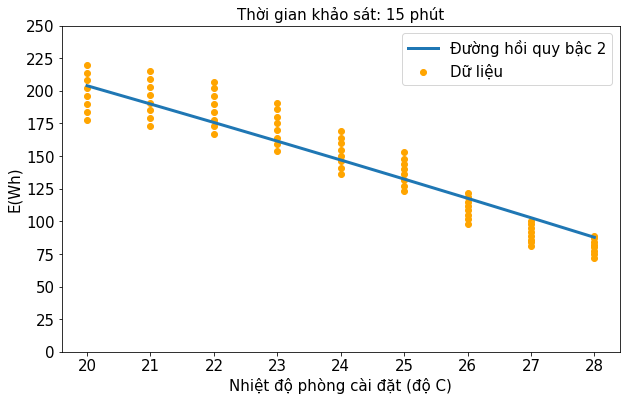

In [57]:
poly_line_data_35_2 = np.array([[35,35,35,35,35,35,35,35,35],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_35_2_trans = PolynomialFeatures(degree=2, include_bias=True,interaction_only=False).fit_transform(poly_line_data_35_2.T)
poly_line_data_35_2_trans
predicted_poly_35_2 = pd.DataFrame(scalery.inverse_transform(model_2.predict(poly_line_data_35_2_trans)))
poly_line_data_35_2 = pd.DataFrame(poly_line_data_35_2.T)
poly_line_data_35_2 = pd.concat([poly_line_data_35_2,predicted_poly_35_2],axis=1)
poly_line_data_35_2.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_35_2

temp_35 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 35]
plt.figure(figsize=(10,6))
plt.scatter(temp_35['Nhiệt độ phòng'].values,temp_35['Điện năng'],color='orange',label='Dữ liệu')
plt.plot(poly_line_data_35_2.iloc[:,1].values,poly_line_data_35_2['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 2')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()


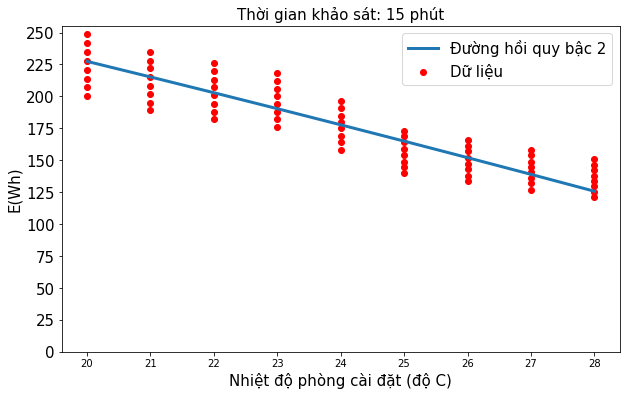

In [58]:
poly_line_data_40_2 = np.array([[40,40,40,40,40,40,40,40,40],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_40_2_trans = PolynomialFeatures(degree=2, include_bias=True,interaction_only=False).fit_transform(poly_line_data_40_2.T)
poly_line_data_40_2_trans
predicted_poly_40_2 = pd.DataFrame(scalery.inverse_transform(model_2.predict(poly_line_data_40_2_trans)))
poly_line_data_40_2 = pd.DataFrame(poly_line_data_40_2.T)
poly_line_data_40_2 = pd.concat([poly_line_data_40_2,predicted_poly_40_2],axis=1)
poly_line_data_40_2.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_40_2

temp_40 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 40]
plt.figure(figsize=(10,6))
plt.scatter(temp_40['Nhiệt độ phòng'].values,temp_40['Điện năng'],color='red',label='Dữ liệu')
plt.plot(poly_line_data_40_2.iloc[:,1].values,poly_line_data_40_2['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 2')
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

Phương trình hồi quy tuyến tính: y= 0.035X1-0.07X2-0.07
Dữ liệu đầu ra cần được chuẩn hóa lại!
-------------------------------------------------------------------------------------------------------------------
Sai số bình phương trung bình điều kiện nhiệt độ MT 30 độ C =  22.74
Sai số bình phương trung bình điều kiện nhiệt độ MT 35 độ C =  66.85
Sai số bình phương trung bình điều kiện nhiệt độ MT 40 độ C =  28.59


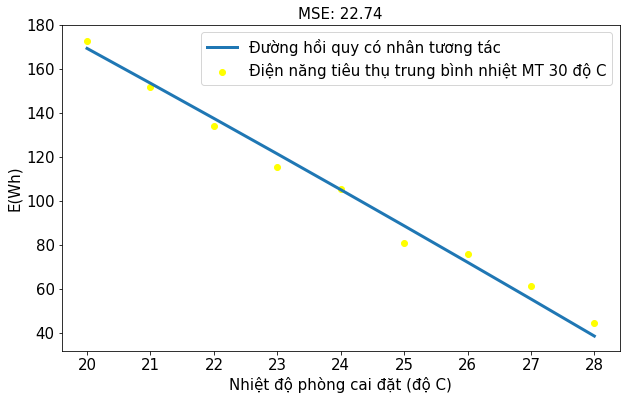

<Figure size 720x432 with 0 Axes>

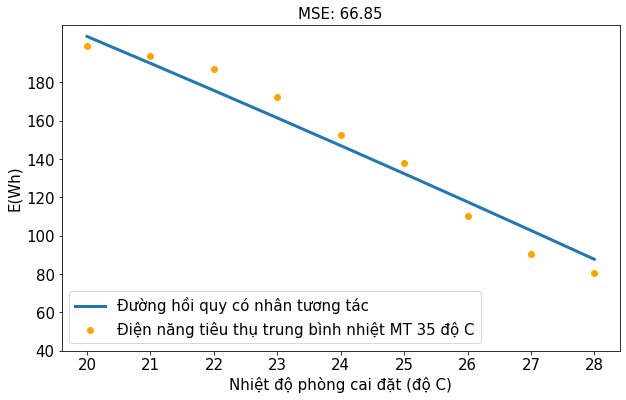

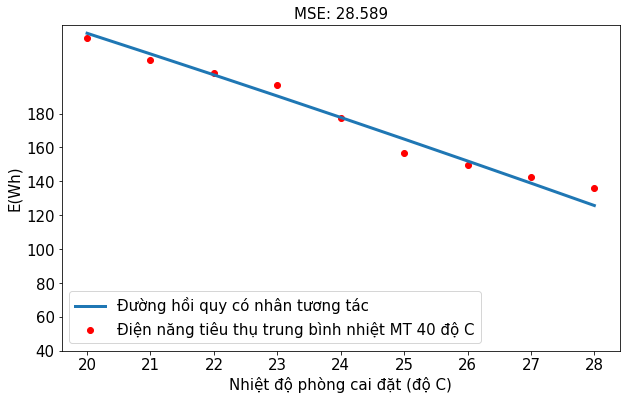

In [59]:
print('Phương trình hồi quy tuyến tính: y= ' + str(metric_coef.iloc[0,0].round(3)) + 'X1' + str(metric_coef.iloc[0,1].round(3)) 
     + 'X2' + str(metric_coef.iloc[0,1].round(2)))
print('Dữ liệu đầu ra cần được chuẩn hóa lại!')
print('-------------------------------------------------------------------------------------------------------------------')
def MSE_poly(MT,y_actual,y_predicted):
    MSE_poly = ((y_actual - y_predicted)**2).sum()/len(y_actual)
    print('Sai số bình phương trung bình điều kiện nhiệt độ MT '+ str(MT) + ' độ C = ',MSE_poly.round(2))
MSE_poly(30,temp_30_detail, predicted_poly_30_2.values.flatten())
MSE_poly(35,temp_35_detail, predicted_poly_35_2.values.flatten())
MSE_poly(40,temp_40_detail, predicted_poly_40_2.values.flatten())

MSE_poly_30_2 = ((temp_30_detail - predicted_poly_30_2.values.flatten())**2).sum()/len(temp_30_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_30_2.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_30_2.round(3)),fontsize=15)
plt.show()

MSE_poly_35_2 = ((temp_35_detail - predicted_poly_35_2.values.flatten())**2).sum()/len(temp_35_detail)
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_35_2.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_35_2.round(3)),fontsize=15)
plt.show()

MSE_poly_40_2 = ((temp_40_detail - predicted_poly_40_2.values.flatten())**2).sum()/len(temp_40_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_40_2.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_40_2.round(3)),fontsize=15)
plt.show()

    Nhiệt độ môi trường  Nhiệt độ phòng  Điện năng thực tế  Điện năng dự đoán
0                  35.0            23.0              191.0         161.472506
1                  40.0            26.0              166.0         152.036484
2                  30.0            23.0              121.0         121.248222
3                  35.0            26.0              119.0         117.672010
4                  35.0            26.0              112.0         117.672010
5                  30.0            23.0              113.0         121.248222
6                  40.0            22.0              220.0         202.874181
7                  40.0            21.0              195.0         215.220662
8                  35.0            27.0              100.0         102.781490
9                  30.0            24.0              110.0         104.975081
10                 40.0            26.0              157.0         152.036484
11                 30.0            23.0              103.0      

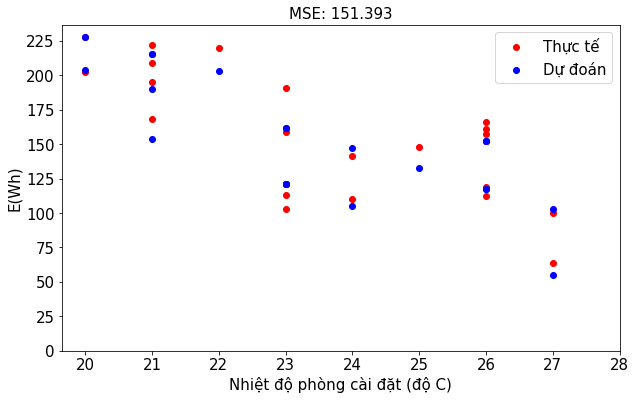

In [60]:
X_test_trans_2 = PolynomialFeatures(degree=2, include_bias=True,interaction_only=False).fit_transform(X_test)
predicted_data_poly_2 = model_2.predict(X_test_trans_2)
predicted_data_poly_2 = scalery.inverse_transform(predicted_data_poly_2)
table_poly_2 = np.concatenate((X_test,scalery.inverse_transform(y_test),
                               predicted_data_poly_2),axis=1)
table_poly_2 = pd.DataFrame(table_poly_2)
table_poly_2.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng thực tế','Điện năng dự đoán']
print(table_poly_2)

MSE_predicted_poly_2 =((table_poly_2['Điện năng thực tế'].values.flatten()-table_poly_2['Điện năng dự đoán'].values.flatten())**2).sum()/len(table_poly_2['Điện năng thực tế'].values.flatten())
plt.figure(figsize=(10,6))
plt.scatter(table_poly_2['Nhiệt độ phòng'],table_poly_2['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_poly_2['Nhiệt độ phòng'],table_poly_2['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,250,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Điện năng tiêu thụ ở 3 mức nhiệt MT 30-35-40 độ C',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_predicted_poly_2.round(3)),fontsize=15)
plt.show()

### Trường hợp interaction_only=False và include_bias=True: bậc 3
Phương trình có dạng: y=a1.x1 + a2.x2 + a3.(x1)2 + a4.(x1x2) + a5.(x2)2 + a6.(x1)3 + a7.(x1)2.x2 + a8.(x2)2.x1 + a9(x2)3 + a10

In [61]:
X_transformed_train_3 = PolynomialFeatures(degree=3, include_bias=True,interaction_only=False).fit_transform(X_train)
X_transformed_train_3

array([[1.0000e+00, 4.0000e+01, 2.7000e+01, ..., 4.3200e+04, 2.9160e+04,
        1.9683e+04],
       [1.0000e+00, 4.0000e+01, 2.7000e+01, ..., 4.3200e+04, 2.9160e+04,
        1.9683e+04],
       [1.0000e+00, 4.0000e+01, 2.5000e+01, ..., 4.0000e+04, 2.5000e+04,
        1.5625e+04],
       ...,
       [1.0000e+00, 3.5000e+01, 2.2000e+01, ..., 2.6950e+04, 1.6940e+04,
        1.0648e+04],
       [1.0000e+00, 3.5000e+01, 2.8000e+01, ..., 3.4300e+04, 2.7440e+04,
        2.1952e+04],
       [1.0000e+00, 4.0000e+01, 2.3000e+01, ..., 3.6800e+04, 2.1160e+04,
        1.2167e+04]])

In [62]:
model_3 = LinearRegression().fit(X_transformed_train_3,y_train)

In [63]:
R2_3 = model_3.score(X_transformed_train_3, y_train)
print('Hệ số R2 = ',R2_3)

Hệ số R2 =  0.9449566217095126


In [64]:
heso_3 = model_3.coef_
heso_3 = pd.DataFrame(heso_3)

sochan_3 = model_3.intercept_
sochan_3 = pd.DataFrame(sochan_3)

for i in range(len(heso_3.transpose())):
    print('Hế số a' + str(i) + ' = ' + str(heso_3.iloc[0,i].round(6)))
print('Số chặn a10 =',sochan_3.iloc[0,0].round(6))

Hế số a0 = 0.0
Hế số a1 = 0.000318
Hế số a2 = 1.860901
Hế số a3 = 0.011042
Hế số a4 = -0.027443
Hế số a5 = -0.062119
Hế số a6 = -0.000223
Hế số a7 = 0.000472
Hế số a8 = -8e-05
Hế số a9 = 0.000897
Số chặn a10 = -13.938772


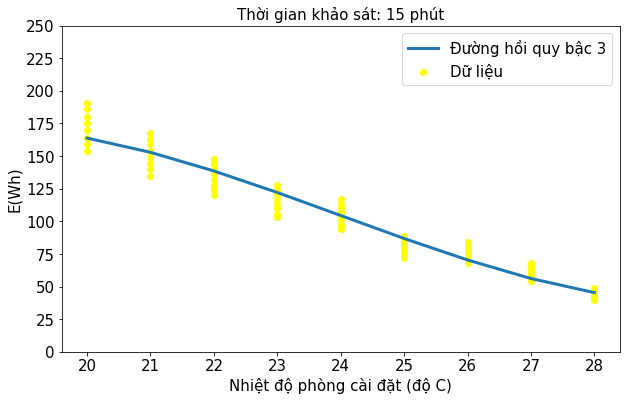

In [65]:
poly_line_data_30_3 = np.array([[30,30,30,30,30,30,30,30,30],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_30_3_trans = PolynomialFeatures(degree=3, include_bias=True,interaction_only=False).fit_transform(poly_line_data_30_3.T)
poly_line_data_30_3_trans
predicted_poly_30_3 = pd.DataFrame(scalery.inverse_transform(model_3.predict(poly_line_data_30_3_trans)))
poly_line_data_30_3 = pd.DataFrame(poly_line_data_30_3.T)
poly_line_data_30_3 = pd.concat([poly_line_data_30_3,predicted_poly_30_3],axis=1)
poly_line_data_30_3.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_30_3

temp_30 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 30]
plt.figure(figsize=(10,6))
plt.scatter(temp_30['Nhiệt độ phòng'].values,temp_30['Điện năng'],color='yellow',label='Dữ liệu')
plt.plot(poly_line_data_30_3.iloc[:,1].values,poly_line_data_30_3['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 3')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

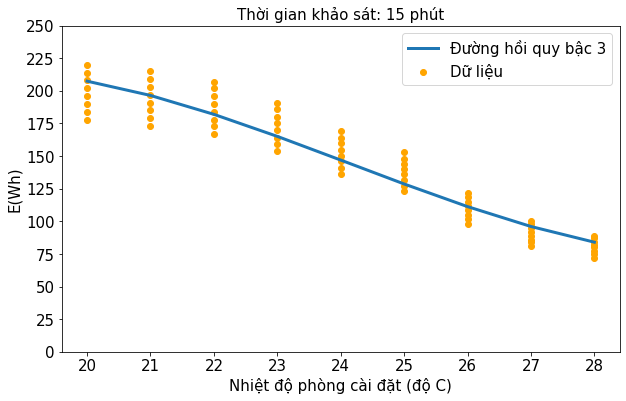

In [66]:
poly_line_data_35_3 = np.array([[35,35,35,35,35,35,35,35,35],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_35_3_trans = PolynomialFeatures(degree=3, include_bias=True,interaction_only=False).fit_transform(poly_line_data_35_3.T)
poly_line_data_35_3_trans
predicted_poly_35_3 = pd.DataFrame(scalery.inverse_transform(model_3.predict(poly_line_data_35_3_trans)))
poly_line_data_35_3 = pd.DataFrame(poly_line_data_35_3.T)
poly_line_data_35_3 = pd.concat([poly_line_data_35_3,predicted_poly_35_3],axis=1)
poly_line_data_35_3.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_35_3

temp_35 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 35]
plt.figure(figsize=(10,6))
plt.scatter(temp_35['Nhiệt độ phòng'].values,temp_35['Điện năng'],color='orange',label='Dữ liệu')
plt.plot(poly_line_data_35_3.iloc[:,1].values,poly_line_data_35_3['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 3')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()


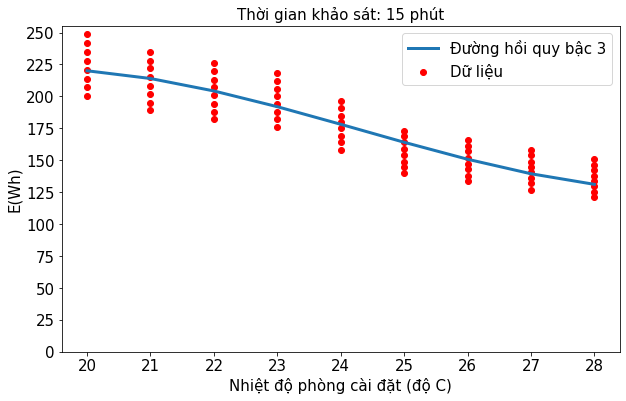

In [67]:
poly_line_data_40_3 = np.array([[40,40,40,40,40,40,40,40,40],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_40_3_trans = PolynomialFeatures(degree=3, include_bias=True,interaction_only=False).fit_transform(poly_line_data_40_3.T)
poly_line_data_40_3_trans
predicted_poly_40_3 = pd.DataFrame(scalery.inverse_transform(model_3.predict(poly_line_data_40_3_trans)))
poly_line_data_40_3 = pd.DataFrame(poly_line_data_40_3.T)
poly_line_data_40_3 = pd.concat([poly_line_data_40_3,predicted_poly_40_3],axis=1)
poly_line_data_40_3.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_40_3

temp_40 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 40]
plt.figure(figsize=(10,6))
plt.scatter(temp_40['Nhiệt độ phòng'].values,temp_40['Điện năng'],color='red',label='Dữ liệu')
plt.plot(poly_line_data_40_3.iloc[:,1].values,poly_line_data_40_3['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 3')
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

Phương trình hồi quy tuyến tính: y= 0.035X1-0.07X2-0.07
Dữ liệu đầu ra cần được chuẩn hóa lại!
-------------------------------------------------------------------------------------------------------------------
Sai số bình phương trung bình điều kiện nhiệt độ MT 30 độ C =  26.18
Sai số bình phương trung bình điều kiện nhiệt độ MT 35 độ C =  34.97
Sai số bình phương trung bình điều kiện nhiệt độ MT 40 độ C =  15.73


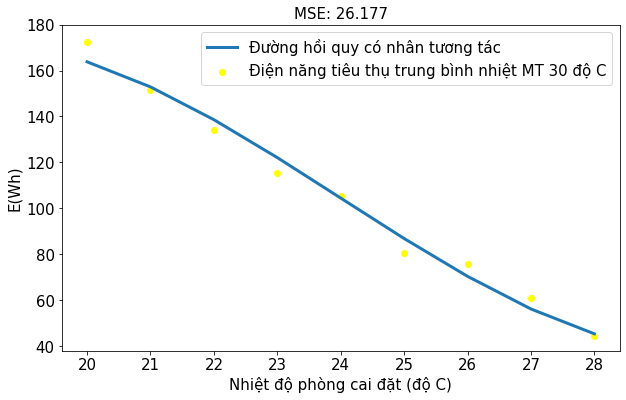

<Figure size 720x432 with 0 Axes>

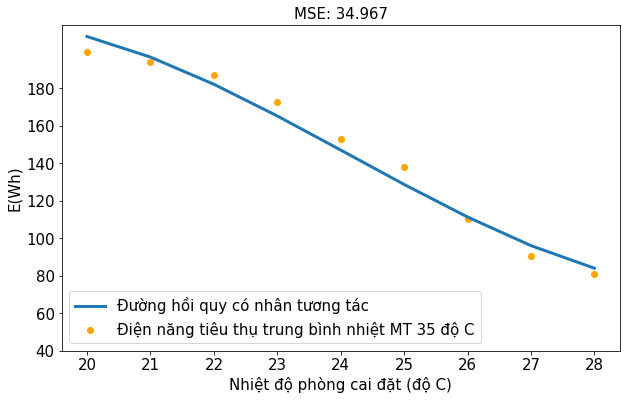

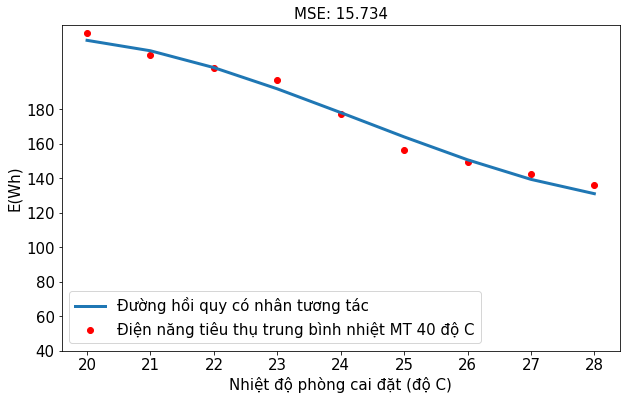

In [68]:
print('Phương trình hồi quy tuyến tính: y= ' + str(metric_coef.iloc[0,0].round(3)) + 'X1' + str(metric_coef.iloc[0,1].round(3)) 
     + 'X2' + str(metric_coef.iloc[0,1].round(2)))
print('Dữ liệu đầu ra cần được chuẩn hóa lại!')
print('-------------------------------------------------------------------------------------------------------------------')
def MSE_poly(MT,y_actual,y_predicted):
    MSE_poly = ((y_actual - y_predicted)**2).sum()/len(y_actual)
    print('Sai số bình phương trung bình điều kiện nhiệt độ MT '+ str(MT) + ' độ C = ',MSE_poly.round(2))
MSE_poly(30,temp_30_detail, predicted_poly_30_3.values.flatten())
MSE_poly(35,temp_35_detail, predicted_poly_35_3.values.flatten())
MSE_poly(40,temp_40_detail, predicted_poly_40_3.values.flatten())

MSE_poly_30_3 = ((temp_30_detail - predicted_poly_30_3.values.flatten())**2).sum()/len(temp_30_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_30_3.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_30_3.round(3)),fontsize=15)
plt.show()

MSE_poly_35_3 = ((temp_35_detail - predicted_poly_35_3.values.flatten())**2).sum()/len(temp_35_detail)
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_35_3.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_35_3.round(3)),fontsize=15)
plt.show()

MSE_poly_40_3 = ((temp_40_detail - predicted_poly_40_3.values.flatten())**2).sum()/len(temp_40_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_40_3.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_40_3.round(3)),fontsize=15)
plt.show()

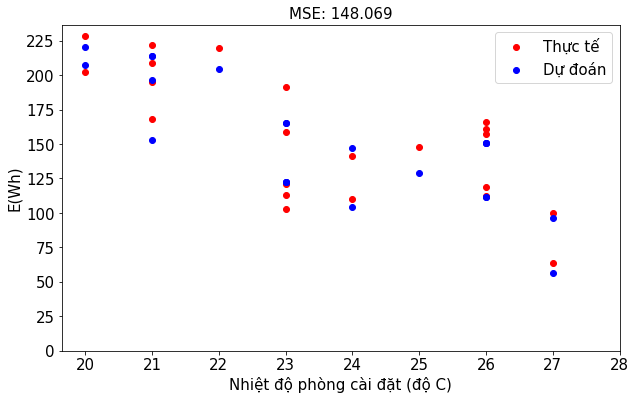

In [69]:
X_test_trans_3 = PolynomialFeatures(degree=3, include_bias=True,interaction_only=False).fit_transform(X_test)
predicted_data_poly_3 = model_3.predict(X_test_trans_3)
predicted_data_poly_3 = scalery.inverse_transform(predicted_data_poly_3)
table_poly_3 = np.concatenate((X_test,scalery.inverse_transform(y_test),
                               predicted_data_poly_3),axis=1)
table_poly_3 = pd.DataFrame(table_poly_3)
table_poly_3.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng thực tế','Điện năng dự đoán']
table_poly_3

MSE_predicted_poly_3 =((table_poly_3['Điện năng thực tế'].values.flatten()-table_poly_3['Điện năng dự đoán'].values.flatten())**2).sum()/len(table_poly_3['Điện năng thực tế'].values.flatten())
plt.figure(figsize=(10,6))
plt.scatter(table_poly_3['Nhiệt độ phòng'],table_poly_3['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_poly_3['Nhiệt độ phòng'],table_poly_3['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,250,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Điện năng tiêu thụ ở 3 mức nhiệt MT 30-35-40 độ C',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_predicted_poly_3.round(3)),fontsize=15)
plt.show()

### Trường hợp interaction_only=False và include_bias=True: bậc 4
Phương trình có dạng: y=a1.x1 + a2.x2 + a3.(x1)2 + a4.(x1x2) + a5.(x2)2 + a6.(x1)3 + a7.(x1)2.x2 + a8.(x2)2.x1 + a9(x2)3 + a10

In [70]:
X_transformed_train_4 = PolynomialFeatures(degree=4, include_bias=True,interaction_only=False).fit_transform(X_train)
X_transformed_train_4 

array([[1.00000e+00, 4.00000e+01, 2.70000e+01, ..., 1.16640e+06,
        7.87320e+05, 5.31441e+05],
       [1.00000e+00, 4.00000e+01, 2.70000e+01, ..., 1.16640e+06,
        7.87320e+05, 5.31441e+05],
       [1.00000e+00, 4.00000e+01, 2.50000e+01, ..., 1.00000e+06,
        6.25000e+05, 3.90625e+05],
       ...,
       [1.00000e+00, 3.50000e+01, 2.20000e+01, ..., 5.92900e+05,
        3.72680e+05, 2.34256e+05],
       [1.00000e+00, 3.50000e+01, 2.80000e+01, ..., 9.60400e+05,
        7.68320e+05, 6.14656e+05],
       [1.00000e+00, 4.00000e+01, 2.30000e+01, ..., 8.46400e+05,
        4.86680e+05, 2.79841e+05]])

In [71]:
model_4 = LinearRegression().fit(X_transformed_train_4,y_train)

In [72]:
R2_4 = model_4.score(X_transformed_train_4, y_train)
print('Hệ số R2 = ',R2_4)

Hệ số R2 =  0.9521906035364267


In [73]:
heso_4 = model_4.coef_
heso_4 = pd.DataFrame(heso_4)

sochan_4 = model_4.intercept_
sochan_4 = pd.DataFrame(sochan_4)

for i in range(len(heso_4.transpose())):
    print('Hế số a' + str(i) + ' = ' + str(heso_4.iloc[0,i].round(6)))
print('Số chặn a15 =',sochan_4.iloc[0,0].round(6))

Hế số a0 = 0.0
Hế số a1 = -4e-06
Hế số a2 = -0.154512
Hế số a3 = -0.000181
Hế số a4 = -1.775865
Hế số a5 = 1.327884
Hế số a6 = -0.004718
Hế số a7 = 0.072306
Hế số a8 = -0.03122
Hế số a9 = -0.022807
Hế số a10 = 8.5e-05
Hế số a11 = -0.000799
Hế số a12 = 0.000251
Hế số a13 = 0.000189
Hế số a14 = 0.000178
Số chặn a15 = 119.758402


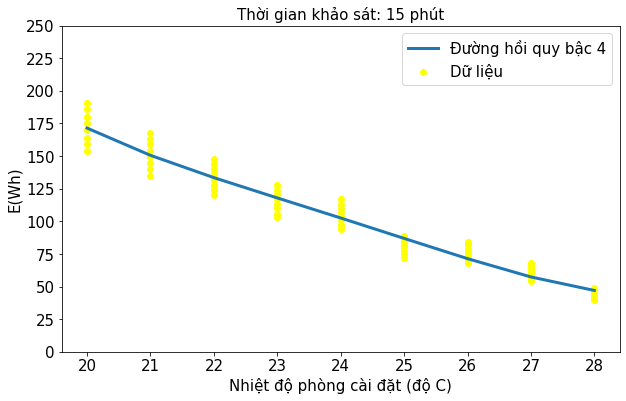

In [74]:
poly_line_data_30_4 = np.array([[30,30,30,30,30,30,30,30,30],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_30_4_trans = PolynomialFeatures(degree=4, include_bias=True,interaction_only=False).fit_transform(poly_line_data_30_4.T)
poly_line_data_30_4_trans
predicted_poly_30_4 = pd.DataFrame(scalery.inverse_transform(model_4.predict(poly_line_data_30_4_trans)))
poly_line_data_30_4 = pd.DataFrame(poly_line_data_30_4.T)
poly_line_data_30_4 = pd.concat([poly_line_data_30_4,predicted_poly_30_4],axis=1)
poly_line_data_30_4.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_30_4

temp_30 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 30]
plt.figure(figsize=(10,6))
plt.scatter(temp_30['Nhiệt độ phòng'].values,temp_30['Điện năng'],color='yellow',label='Dữ liệu')
plt.plot(poly_line_data_30_4.iloc[:,1].values,poly_line_data_30_4['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 4')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

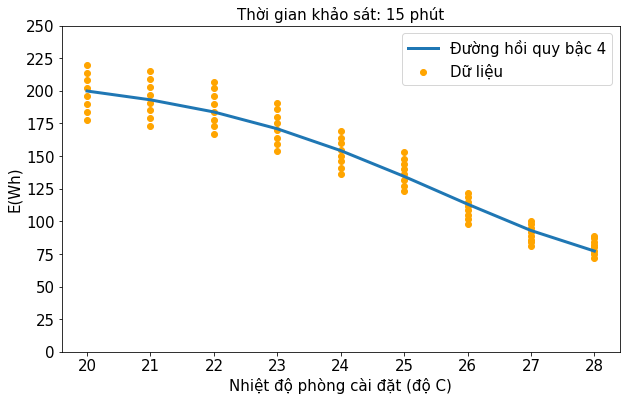

In [75]:
poly_line_data_35_4 = np.array([[35,35,35,35,35,35,35,35,35],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_35_4_trans = PolynomialFeatures(degree=4, include_bias=True,interaction_only=False).fit_transform(poly_line_data_35_4.T)
poly_line_data_35_4_trans
predicted_poly_35_4 = pd.DataFrame(scalery.inverse_transform(model_4.predict(poly_line_data_35_4_trans)))
poly_line_data_35_4 = pd.DataFrame(poly_line_data_35_4.T)
poly_line_data_35_4 = pd.concat([poly_line_data_35_4,predicted_poly_35_4],axis=1)
poly_line_data_35_4.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_35_4

temp_35 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 35]
plt.figure(figsize=(10,6))
plt.scatter(temp_35['Nhiệt độ phòng'].values,temp_35['Điện năng'],color='orange',label='Dữ liệu')
plt.plot(poly_line_data_35_4.iloc[:,1].values,poly_line_data_35_4['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 4')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

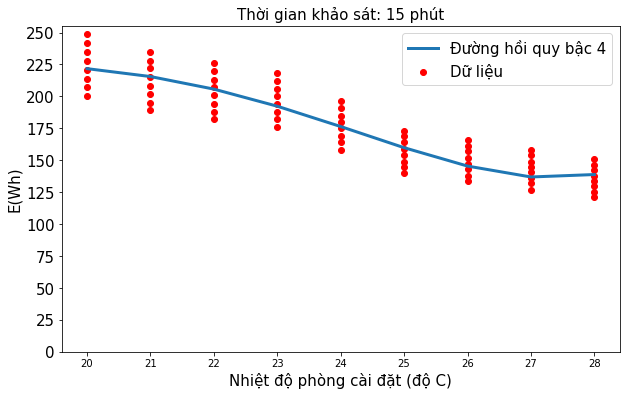

In [76]:
poly_line_data_40_4 = np.array([[40,40,40,40,40,40,40,40,40],
                   [20,21,22,23,24,25,26,27,28]])
poly_line_data_40_4_trans = PolynomialFeatures(degree=4, include_bias=True,interaction_only=False).fit_transform(poly_line_data_40_4.T)
poly_line_data_40_4_trans
predicted_poly_40_4 = pd.DataFrame(scalery.inverse_transform(model_4.predict(poly_line_data_40_4_trans)))
poly_line_data_40_4 = pd.DataFrame(poly_line_data_40_4.T)
poly_line_data_40_4 = pd.concat([poly_line_data_40_4,predicted_poly_40_4],axis=1)
poly_line_data_40_4.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng dự đoán']
poly_line_data_40_4

temp_40 = data_set_frame.loc[data_set_frame['Nhiệt độ môi trường'] == 40]
plt.figure(figsize=(10,6))
plt.scatter(temp_40['Nhiệt độ phòng'].values,temp_40['Điện năng'],color='red',label='Dữ liệu')
plt.plot(poly_line_data_40_4.iloc[:,1].values,poly_line_data_40_4['Điện năng dự đoán'].values,linewidth=3
         ,label='Đường hồi quy bậc 4')
plt.yticks(np.arange(0,275,25),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.title('Thời gian khảo sát: 15 phút',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

Phương trình hồi quy tuyến tính: y= 0.035X1-0.07X2-0.07
Dữ liệu đầu ra cần được chuẩn hóa lại!
-------------------------------------------------------------------------------------------------------------------
Sai số bình phương trung bình điều kiện nhiệt độ MT 30 độ C =  10.6
Sai số bình phương trung bình điều kiện nhiệt độ MT 35 độ C =  6.15
Sai số bình phương trung bình điều kiện nhiệt độ MT 40 độ C =  13.31


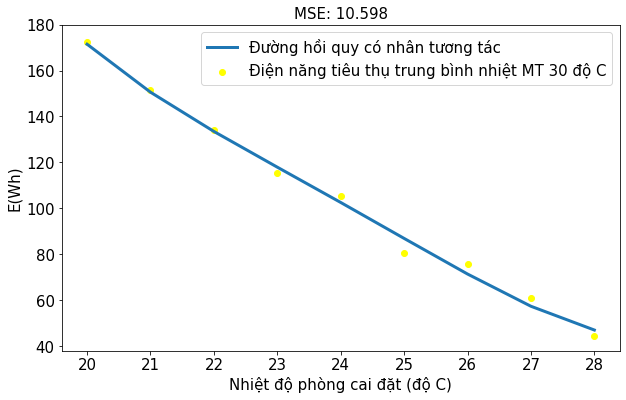

<Figure size 720x432 with 0 Axes>

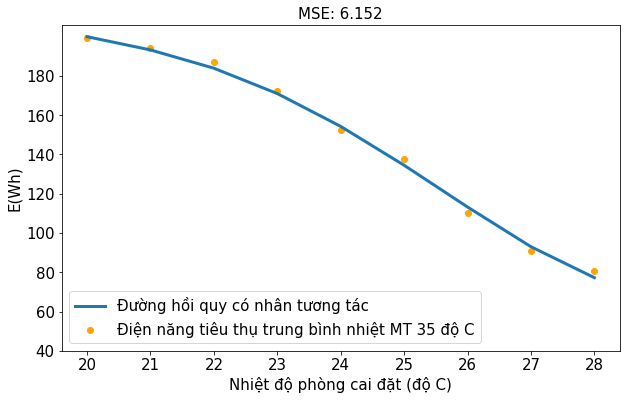

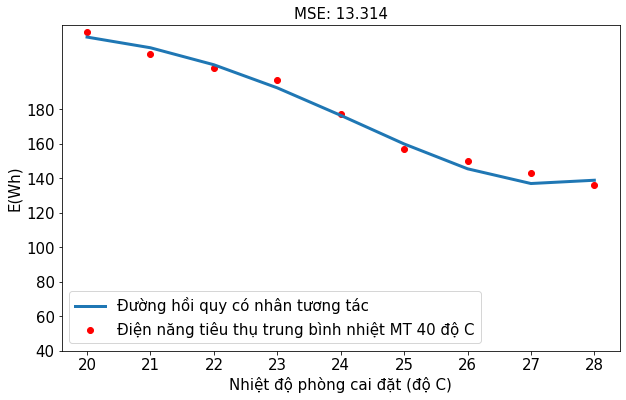

In [77]:
print('Phương trình hồi quy tuyến tính: y= ' + str(metric_coef.iloc[0,0].round(3)) + 'X1' + str(metric_coef.iloc[0,1].round(3)) 
     + 'X2' + str(metric_coef.iloc[0,1].round(2)))
print('Dữ liệu đầu ra cần được chuẩn hóa lại!')
print('-------------------------------------------------------------------------------------------------------------------')
def MSE_poly(MT,y_actual,y_predicted):
    MSE_poly = ((y_actual - y_predicted)**2).sum()/len(y_actual)
    print('Sai số bình phương trung bình điều kiện nhiệt độ MT '+ str(MT) + ' độ C = ',MSE_poly.round(2))
MSE_poly(30,temp_30_detail, predicted_poly_30_4.values.flatten())
MSE_poly(35,temp_35_detail, predicted_poly_35_4.values.flatten())
MSE_poly(40,temp_40_detail, predicted_poly_40_4.values.flatten())

MSE_poly_30_4 = ((temp_30_detail - predicted_poly_30_4.values.flatten())**2).sum()/len(temp_30_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_30_4.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_30_4.round(3)),fontsize=15)
plt.show()

MSE_poly_35_4 = ((temp_35_detail - predicted_poly_35_4.values.flatten())**2).sum()/len(temp_35_detail)
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_35_4.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_35_4.round(3)),fontsize=15)
plt.show()

MSE_poly_40_4 = ((temp_40_detail - predicted_poly_40_4.values.flatten())**2).sum()/len(temp_40_detail)
plt.figure(figsize=(10,6))
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_40_4.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(40,200,20),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_poly_40_4.round(3)),fontsize=15)
plt.show()

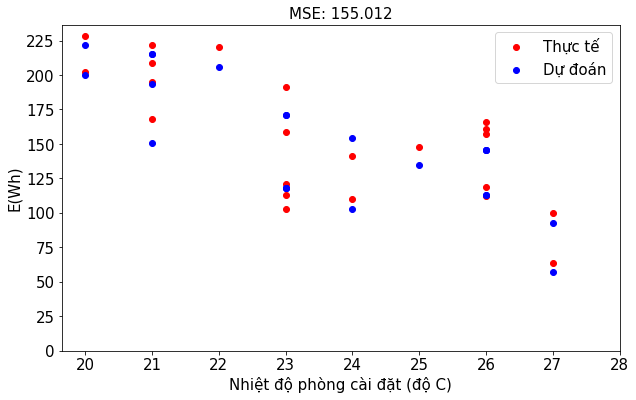

    Nhiệt độ môi trường  Nhiệt độ phòng  Điện năng thực tế  Điện năng dự đoán
0                  35.0            23.0              191.0         170.931178
1                  40.0            26.0              166.0         145.434346
2                  30.0            23.0              121.0         117.940347
3                  35.0            26.0              119.0         113.192722
4                  35.0            26.0              112.0         113.192722
5                  30.0            23.0              113.0         117.940347
6                  40.0            22.0              220.0         205.692221
7                  40.0            21.0              195.0         215.535622
8                  35.0            27.0              100.0          92.988206
9                  30.0            24.0              110.0         102.570248
10                 40.0            26.0              157.0         145.434346
11                 30.0            23.0              103.0      

In [78]:
X_test_trans_4 = PolynomialFeatures(degree=4, include_bias=True,interaction_only=False).fit_transform(X_test)
predicted_data_poly_4 = model_4.predict(X_test_trans_4)
predicted_data_poly_4 = scalery.inverse_transform(predicted_data_poly_4)
table_poly_4 = np.concatenate((X_test,scalery.inverse_transform(y_test),
                               predicted_data_poly_4),axis=1)
table_poly_4 = pd.DataFrame(table_poly_4)
table_poly_4.columns = ['Nhiệt độ môi trường','Nhiệt độ phòng','Điện năng thực tế','Điện năng dự đoán']
table_poly_4

MSE_predicted_poly_4 =((table_poly_4['Điện năng thực tế'].values.flatten()-table_poly_4['Điện năng dự đoán'].values.flatten())**2).sum()/len(table_poly_4['Điện năng thực tế'].values.flatten())
plt.figure(figsize=(10,6))
plt.scatter(table_poly_4['Nhiệt độ phòng'],table_poly_4['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_poly_4['Nhiệt độ phòng'],table_poly_4['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(0,250,25),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Điện năng tiêu thụ ở 3 mức nhiệt MT 30-35-40 độ C',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('MSE: ' + str(MSE_predicted_poly_4.round(3)),fontsize=15)
plt.show()
print(table_poly_4)

In [79]:
score_i_train = []
score_i_test = []
i = int(input('Nhập bậc mũ: '))
for i in range(1,i+1,1):
    X_train_trans = PolynomialFeatures(degree=i,include_bias=True,interaction_only=False).fit_transform(X_train)
    model_i = LinearRegression().fit(X_train_trans,y_train)
    score_i_train.append(model_i.score(X_train_trans,y_train).round(3))

    X_test_trans = PolynomialFeatures(degree=i,include_bias=True,interaction_only=False).fit_transform(X_test)
    score_i_test.append(model_i.score(X_test_trans,y_test).round(3))
print(score_i_train)
print(score_i_test)

# plt.figure(figsize=(10,5))
# plt.plot(score_i_train,label='Training set')
# plt.plot(score_i_test,label='Training set')
# plt.xticks(np.arange(0,i+1,1),fontsize=15)
# plt.ylabel('R2',fontsize=15)
# plt.yticks(fontsize=15)
# plt.title('Chỉ số R2',fontsize=15)
# plt.xlabel('Bậc mũ',fontsize=15)
# plt.show()

Nhập bậc mũ: 10
[0.93, 0.939, 0.945, 0.952, 0.954, 0.954, 0.955, 0.955, 0.929, 0.94]
[0.906, 0.926, 0.927, 0.924, 0.92, 0.919, 0.914, 0.912, 0.873, 0.878]


In [80]:
# def MSE_i_function(X,Y):
#     MSE = ((X - Y.flatten())**2).sum()/len(X)
#     return MSE
# temp_40_i = np.array([[40,40,40,40,40,40,40,40,40],
#                    [20,21,22,23,24,25,26,27,28]])
# temp_30_i = np.array([[30,30,30,30,30,30,30,30,30],
#                    [20,21,22,23,24,25,26,27,28]])
# temp_35_i = np.array([[35,35,35,35,35,35,35,35,35],
#                    [20,21,22,23,24,25,26,27,28]])

# MSE_i = []
# MSE_Y = []
# i = int(input('Nhập bậc mũ: '))
# for i in range(1,i+1,1):
#     X_train_trans = PolynomialFeatures(degree=i,include_bias=True,interaction_only=False).fit_transform(X_train)
#     model_i = LinearRegression().fit(X_train_trans,y_train)
#     temp_40_i_trans = PolynomialFeatures(degree=i, include_bias=True,interaction_only=False).fit_transform(temp_40_i.T)
#     temp_35_i_trans = PolynomialFeatures(degree=i, include_bias=True,interaction_only=False).fit_transform(temp_35_i.T)
#     temp_30_i_trans = PolynomialFeatures(degree=i, include_bias=True,interaction_only=False).fit_transform(temp_30_i.T)
    
#     predict_30_i = model_i.predict(temp_30_i_trans)
#     predict_30_i = scalery.inverse_transform(predict_30_i)
    
#     predict_35_i = model_i.predict(temp_35_i_trans)
#     predict_35_i = scalery.inverse_transform(predict_35_i)
    
#     predict_40_i = model_i.predict(temp_40_i_trans)
#     predict_40_i = scalery.inverse_transform(predict_40_i)
    

#     MSE_30_i = MSE_i_function(temp_30_detail,predict_30_i)
#     MSE_i.append(MSE_30_i)
#     MSE_35_i = MSE_i_function(temp_35_detail,predict_35_i)
#     MSE_i.append(MSE_35_i)
#     MSE_40_i = MSE_i_function(temp_40_detail,predict_40_i)
#     MSE_i.append(MSE_40_i)
    
# #     X_test_trans_i = PolynomialFeatures(degree=i, include_bias=True,interaction_only=False).fit_transform(X_test)
# #     Y_predict_test_i = model_i.predict(X_test_trans_i)
# #     Y_test_inver = scalery.inverse_transform(y_test)
# #     Y_predict_test_inver_i = scalery.fit_transform(Y_predict_test_i)
    
# #     MSE_Y_i = ((Y_test_inver - Y_predict_test_inver_i)**2).sum()/len(Y_test_inver)
# #     MSE_Y.append(MSE_Y_i)

# print(np.array(MSE_i).reshape(i,3))                     

In [81]:
# i = int(input('Nhập bậc mũ: '))
# for i in range(1,i+1,1):
#     X_train_trans = PolynomialFeatures(degree=i,include_bias=True,interaction_only=False).fit_transform(X_train)
#     model_i = LinearRegression().fit(X_train_trans,y_train)
    
#     x_test_trans  =  PolynomialFeatures(degree=i,include_bias=True,interaction_only=False).fit_transform(X_test)
    
#     y_predict = model_i.predict(x_test_trans)
    
#     y_inverse = scalery.fit_transform(y_predict)

In [82]:
data_set_frame.corr()

,Nhiệt độ môi trường,Nhiệt độ phòng,Điện năng
Nhiệt độ môi trường,1.000000e+00,5.929408e-17,0.600287
Nhiệt độ phòng,5.929408e-17,1.000000e+00,-0.753870
Điện năng,6.002867e-01,-7.538702e-01,1.000000


In [83]:
corr = np.corrcoef(data_set_frame['Nhiệt độ môi trường'], data_set_frame['Điện năng'])
corr

array([[1.        , 0.60028667],
       [0.60028667, 1.        ]])

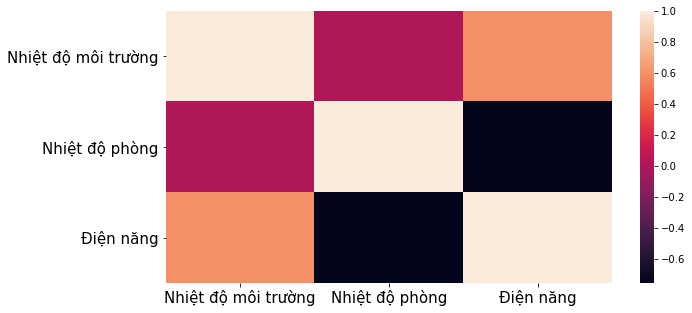

In [84]:
plt.figure(figsize=(10,5))
sns.heatmap(data_set_frame.corr())
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [85]:
data_set_frame.corr()

,Nhiệt độ môi trường,Nhiệt độ phòng,Điện năng
Nhiệt độ môi trường,1.000000e+00,5.929408e-17,0.600287
Nhiệt độ phòng,5.929408e-17,1.000000e+00,-0.753870
Điện năng,6.002867e-01,-7.538702e-01,1.000000


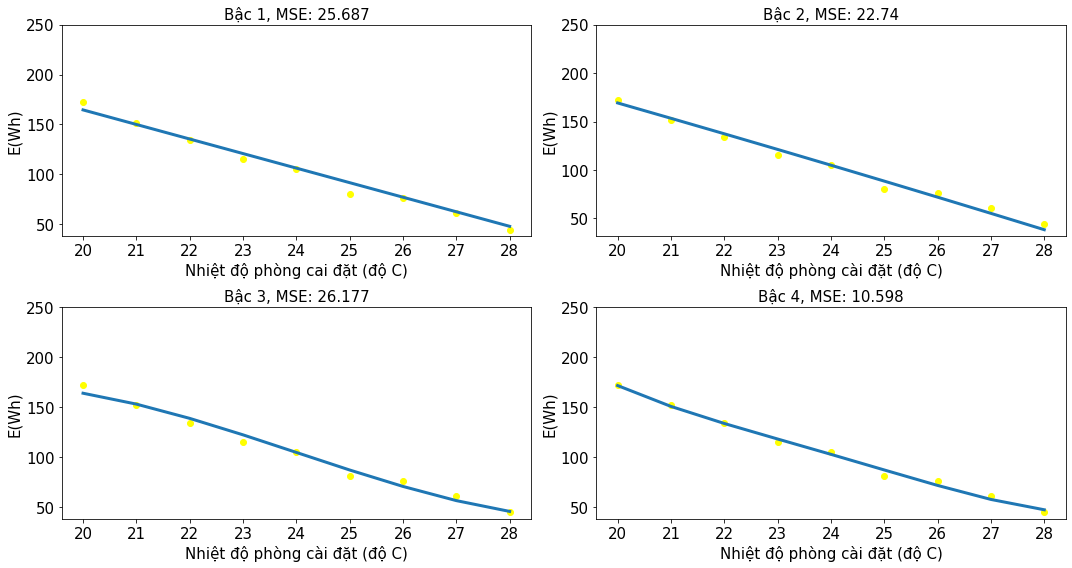

In [86]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_linear_30.values,linewidth=3,label='Đường hồi quy')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 1, MSE: ' + str(MSE_linear_30.round(3)),fontsize=15)

plt.subplot(2,2,2)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_30_2.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 2, MSE: ' + str(MSE_poly_30_2.round(3)),fontsize=15)


plt.subplot(2,2,3)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_30_3.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 3, MSE: ' + str(MSE_poly_30_3.round(3)),fontsize=15)

plt.subplot(2,2,4)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_30_detail,color='yellow',label='Điện năng tiêu thụ trung bình nhiệt MT 30 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_30_4.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 4, MSE: ' + str(MSE_poly_30_4.round(3)),fontsize=15)

plt.tight_layout()

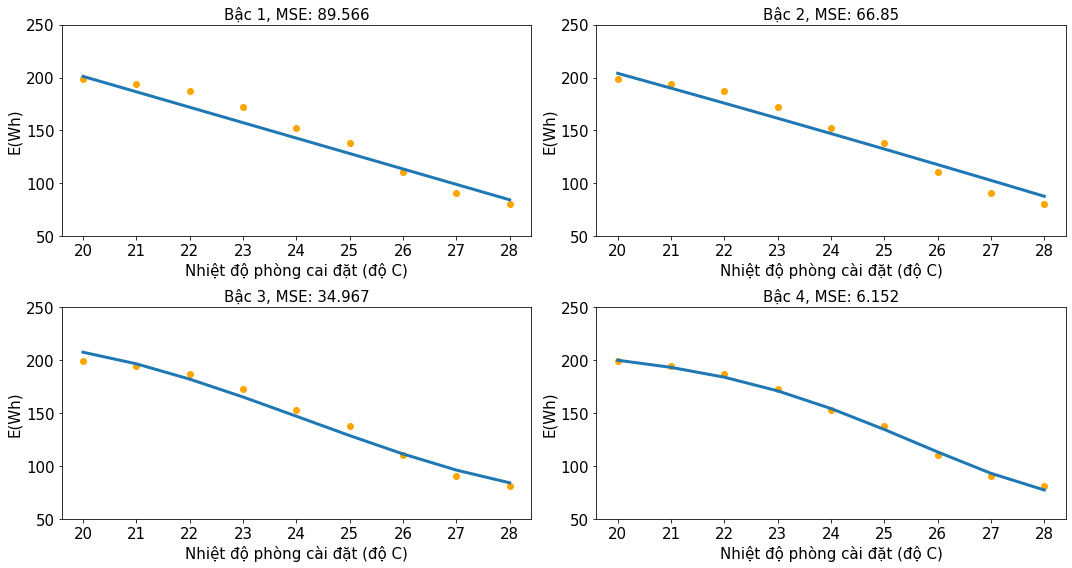

In [87]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_linear_35.values,linewidth=3,label='Đường hồi quy')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 1, MSE: ' + str(MSE_linear_35.round(3)),fontsize=15)

plt.subplot(2,2,2)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_35_2.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 2, MSE: ' + str(MSE_poly_35_2.round(3)),fontsize=15)


plt.subplot(2,2,3)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_35_3.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 3, MSE: ' + str(MSE_poly_35_3.round(3)),fontsize=15)

plt.subplot(2,2,4)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_35_detail,color='orange',label='Điện năng tiêu thụ trung bình nhiệt MT 35 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_35_4.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,300,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 4, MSE: ' + str(MSE_poly_35_4.round(3)),fontsize=15)

plt.tight_layout()


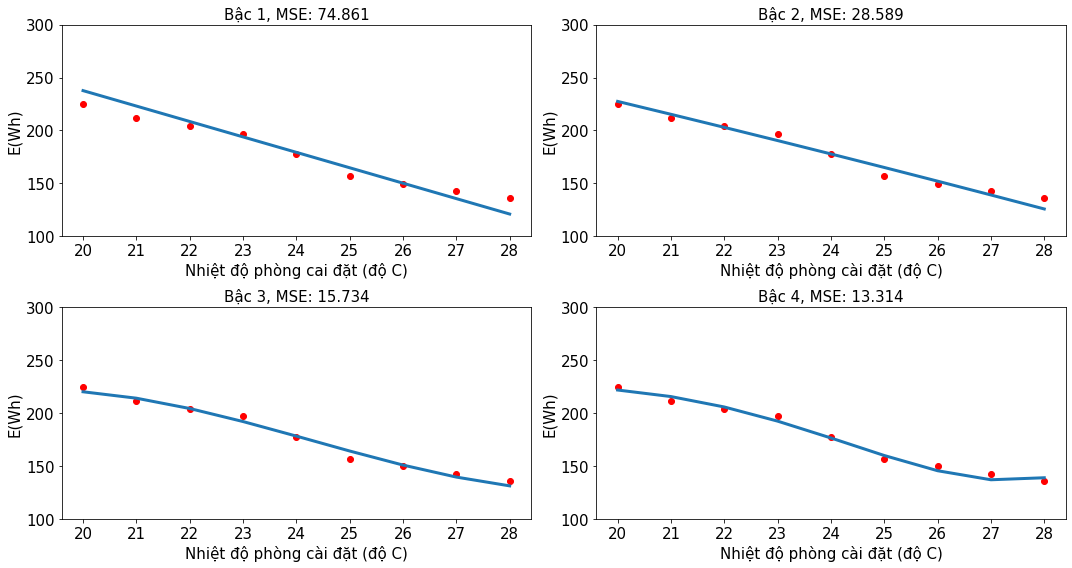

In [88]:
plt.figure(figsize=(15,8))

plt.subplot(2,2,1)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_linear_40.values,linewidth=3,label='Đường hồi quy')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(100,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cai đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 1, MSE: ' + str(MSE_linear_40.round(3)),fontsize=15)

plt.subplot(2,2,2)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_40_2.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(100,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 2, MSE: ' + str(MSE_poly_40_2.round(3)),fontsize=15)


plt.subplot(2,2,3)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_40_3.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(100,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 3, MSE: ' + str(MSE_poly_40_3.round(3)),fontsize=15)

plt.subplot(2,2,4)
plt.scatter([20,21,22,23,24,25,26,27,28],temp_40_detail,color='red',label='Điện năng tiêu thụ trung bình nhiệt MT 40 độ C')
plt.plot([20,21,22,23,24,25,26,27,28],predicted_poly_40_4.values,linewidth=3,label='Đường hồi quy có nhân tương tác')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(100,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 4, MSE: ' + str(MSE_poly_40_4.round(3)),fontsize=15)

plt.tight_layout()


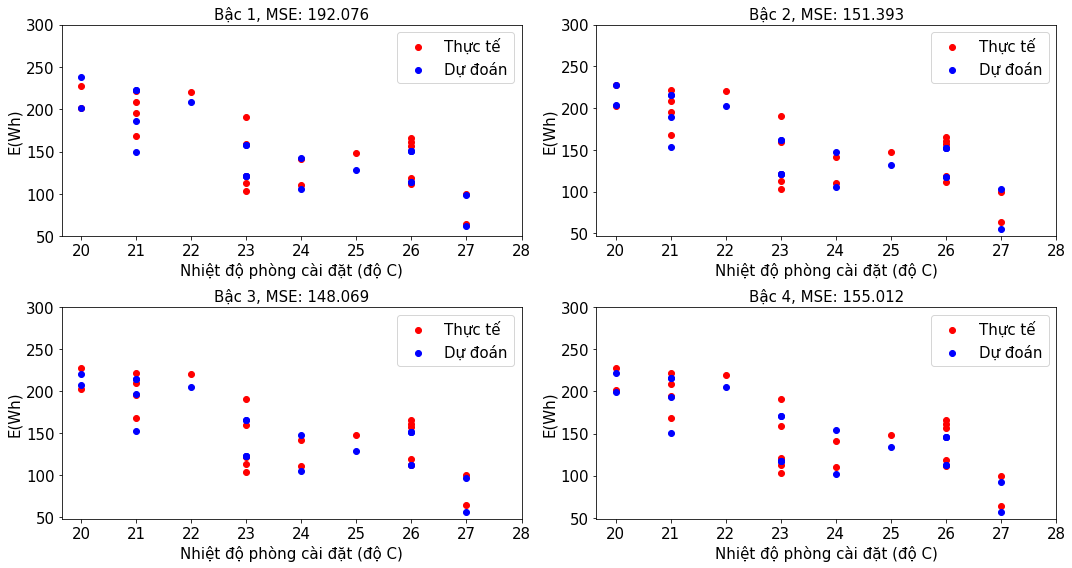

In [89]:
plt.figure(figsize=(15,8))

plt.subplot(221)
plt.scatter(table_linear['Nhiệt độ phòng'],table_linear['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_linear['Nhiệt độ phòng'],table_linear['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Bậc 1, MSE: ' + str(MSE_predicted_linear.round(3)),fontsize=15)
plt.legend(loc='best',fontsize=15)

plt.subplot(222)
plt.scatter(table_poly_2['Nhiệt độ phòng'],table_poly_2['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_poly_2['Nhiệt độ phòng'],table_poly_2['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Điện năng tiêu thụ ở 3 mức nhiệt MT 30-35-40 độ C',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('Bậc 2, MSE: ' + str(MSE_predicted_poly_2.round(3)),fontsize=15)

plt.subplot(223)
plt.scatter(table_poly_3['Nhiệt độ phòng'],table_poly_3['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_poly_3['Nhiệt độ phòng'],table_poly_3['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Điện năng tiêu thụ ở 3 mức nhiệt MT 30-35-40 độ C',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('Bậc 3, MSE: ' + str(MSE_predicted_poly_3.round(3)),fontsize=15)

plt.subplot(224)
plt.scatter(table_poly_4['Nhiệt độ phòng'],table_poly_4['Điện năng thực tế'].values,color='red',label='Thực tế')
plt.scatter(table_poly_4['Nhiệt độ phòng'],table_poly_4['Điện năng dự đoán'],color='blue',label='Dự đoán')
plt.xticks(np.arange(20,29,1),fontsize=15)
plt.yticks(np.arange(50,350,50),fontsize=15)
plt.xlabel('Nhiệt độ phòng cài đặt (độ C)',fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.title('Điện năng tiêu thụ ở 3 mức nhiệt MT 30-35-40 độ C',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('Bậc 4, MSE: ' + str(MSE_predicted_poly_4.round(3)),fontsize=15)

plt.tight_layout()

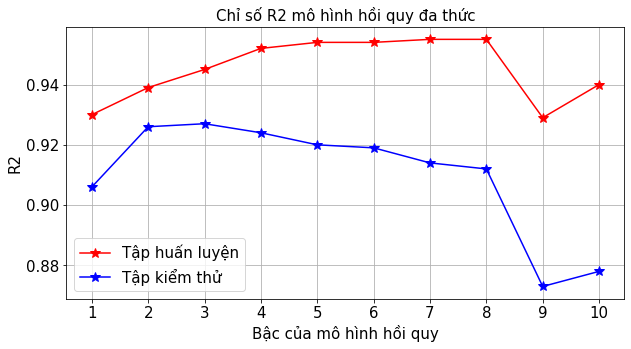

In [90]:
plt.figure(figsize=(10,5))
plt.plot(score_i_train,color='red',label='Tập huấn luyện',marker='*',markersize=10)
plt.plot(score_i_test,color='blue',label='Tập kiểm thử',marker='*',markersize=10)
plt.xticks(np.arange(10),np.arange(1,11,1),fontsize=15)
plt.ylabel('R2',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Bậc của mô hình hồi quy',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.title('Chỉ số R2 mô hình hồi quy đa thức',fontsize=15)
plt.grid()
plt.show()

In [91]:
print(score_i_test)
print(score_i_train)

[0.906, 0.926, 0.927, 0.924, 0.92, 0.919, 0.914, 0.912, 0.873, 0.878]
[0.93, 0.939, 0.945, 0.952, 0.954, 0.954, 0.955, 0.955, 0.929, 0.94]


In [92]:
MSE_all_30 = []
MSE_all_30.append(MSE_linear_30)
MSE_all_30.append(MSE_poly_30_2)
MSE_all_30.append(MSE_poly_30_3)
MSE_all_30.append(MSE_poly_30_4)
MSE_all_30

[25.686784751210315, 22.73996061307508, 26.17670038380041, 10.598115613381289]

In [93]:
MSE_all_35 = []
MSE_all_35.append(MSE_linear_35)
MSE_all_35.append(MSE_poly_35_2)
MSE_all_35.append(MSE_poly_35_3)
MSE_all_35.append(MSE_poly_35_4)
MSE_all_35

[89.56587326681546, 66.85006599278105, 34.96724425633924, 6.1522341781259]

In [94]:
MSE_all_40 = []
MSE_all_40.append(MSE_linear_40)
MSE_all_40.append(MSE_poly_40_2)
MSE_all_40.append(MSE_poly_40_3)
MSE_all_40.append(MSE_poly_40_4)
MSE_all_40

[74.86120214224631, 28.58902169242282, 15.734349736612801, 13.31405868262981]

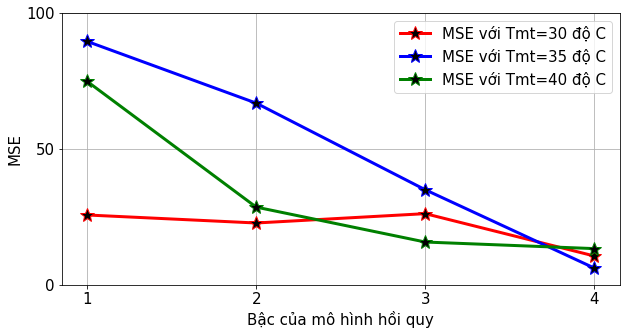

In [95]:
plt.figure(figsize=(10,5))
plt.plot(MSE_all_30,color='red',linewidth=3,marker='*',markersize=15,markerfacecolor='black',label='MSE với Tmt=30 độ C')
plt.plot(MSE_all_35,color='blue',linewidth=3,marker='*',markersize=15,markerfacecolor='black',label='MSE với Tmt=35 độ C')
plt.plot(MSE_all_40,color='green',linewidth=3,marker='*',markersize=15,markerfacecolor='black',label='MSE với Tmt=40 độ C')
plt.xticks(np.arange(0,4),[1,2,3,4],fontsize=15)
plt.yticks(np.arange(0,150,50),fontsize=15)
plt.xlabel('Bậc của mô hình hồi quy',fontsize=15)
plt.ylabel('MSE',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.show()

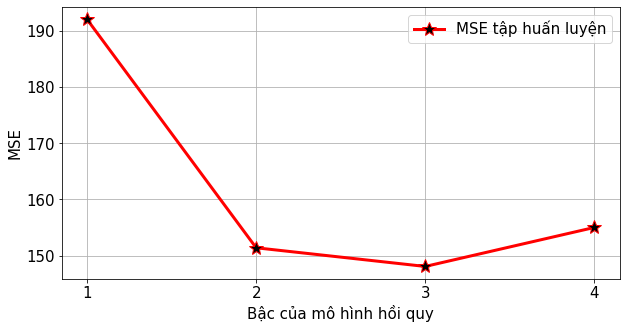

In [96]:
MSE_all_test = []
MSE_all_test.append(MSE_predicted_linear)
MSE_all_test.append(MSE_predicted_poly_2)
MSE_all_test.append(MSE_predicted_poly_3)
MSE_all_test.append(MSE_predicted_poly_4)

plt.figure(figsize=(10,5))
plt.plot(MSE_all_test,color='red',linewidth=3,marker='*',markersize=15,markerfacecolor='black',label='MSE tập huấn luyện')
plt.xticks(np.arange(0,4),[1,2,3,4],fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Bậc của mô hình hồi quy',fontsize=15)
plt.ylabel('MSE',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.grid()
plt.show()

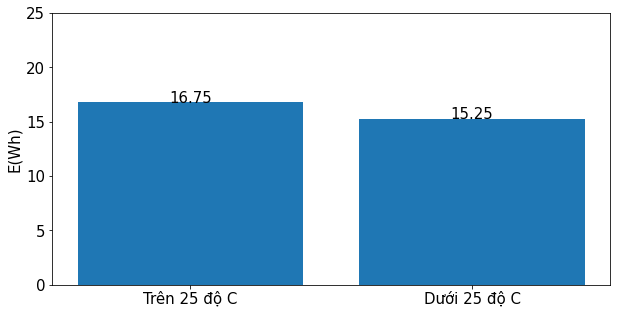

In [97]:
chenhlechmoitruong = abs(pd.Series(temp_30_detail).diff(1))
chenhlechmoitruong_new = []
chenhlechmoitruong_new.append(chenhlechmoitruong.iloc[1:5].mean())
chenhlechmoitruong_new.append(chenhlechmoitruong.iloc[5:].mean())

plt.figure(figsize=(10,5))
plt.bar(np.arange(2), chenhlechmoitruong_new)
plt.xticks(np.arange(2),['Trên 25 độ C','Dưới 25 độ C'],fontsize=15)
plt.yticks(np.arange(0,30,5),fontsize=15)
addlabels(np.arange(2),np.array(chenhlechmoitruong_new).round(2))
plt.ylabel('E(Wh)',fontsize=15)
plt.show()

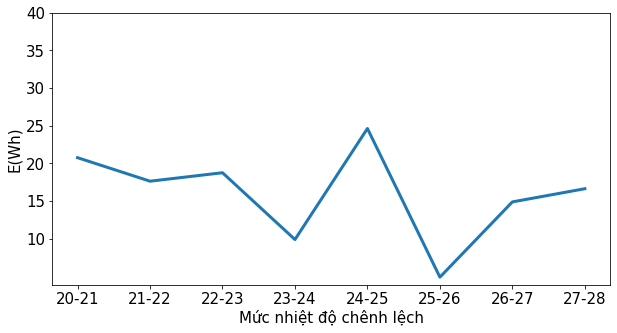

In [98]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(8),chenhlechmoitruong[1:],linewidth=3)
plt.xticks(np.arange(8),['20-21','21-22','22-23','23-24','24-25','25-26','26-27','27-28'],fontsize=15)
plt.xlabel('Mức nhiệt độ chênh lệch',fontsize=15)
plt.yticks(np.arange(10,45,5),fontsize=15)
plt.ylabel('E(Wh)',fontsize=15)
plt.show()

In [99]:
print(heso_3)

     0         1         2         3         4         5         6         7  \
0  0.0  0.000318  1.860901  0.011042 -0.027443 -0.062119 -0.000223  0.000472   

         8         9  
0 -0.00008  0.000897  


In [100]:
data_set_frame.max()

Nhiệt độ môi trường     40.0
Nhiệt độ phòng          28.0
Điện năng              249.0
dtype: float64

In [101]:
data_set_frame.min()

Nhiệt độ môi trường    30.0
Nhiệt độ phòng         20.0
Điện năng              40.0
dtype: float64

In [ ]:
print()